In [12]:
# Import Python packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from collections import Counter
from collections import OrderedDict# order a dict by value
from operator import itemgetter
%matplotlib inline

In [13]:
# Create functions

from math import *

def square_rooted(x):
    return round(sqrt(sum([a*a for a in x])),3)

def cosine_similarity(x,y):
    numerateur = sum(a*b for a,b in zip(x,y))
    denominateur = square_rooted(x)*square_rooted(y)
    return round(float(numerateur/denominateur),3)

def mahalanobis_similarity(x,y,z):
    numerateur = (x-y)# x= User's visit duration; y= mean of visit durations
    denominateur = z # z = standart deviation of visit durations
    return round(sqrt(pow(numerateur/denominateur,2)),3)

def num_missing(m):
     return sum(m.isnull())
    
def num_isnan(m):
    return sum(np.isnan(m))
    
#########calculate the  features ' Partner'; Create functions that can transform features of 'Partner' notion
def partner(row):
    if row ==1:
        no_partner=1
    else:
        no_partner=0
    return no_partner
def partner1(row):
    if row ==2:
        partner1=1
    else:
        partner1=0
    return partner1  
def partner2(row):
    if 2< row < 5:
        partner34=1
    else:
        partner34=0
    return partner34 
def partnergr(row):
    if row >4:
        partnergr=1
    else:
        partnergr=0
    return partnergr

# calculate the  features 'Novelty'
def novelty(row):
    if row==1:
        first=1
    else:
        first=0
    return first

def returning(row):
    if row==2:
        returning=1
    else:
        returning=0
    return returning

def returning1(row):
    if row>2:
        returning1=1
    else:
        returning1=0  
    return returning1

#####calculate the  features ' Ticket level'
def level1(row):
     if row<=X['avg_ticketU'].describe()[4]: # avg_ticket< 14 euros
            level1=1 # but that would be interessting to test with real values 
     else:
        level1=0
     return level1

def level2(row):
    if X['avg_ticketU'].describe()[4] < row <= X['avg_ticketU'].describe()[5]:
        level2=1 # would be interessting to test with  real values
    else:
        level2=0
    return level2

def level3(row):
    if X['avg_ticketU'].describe()[5] < row <= X['avg_ticketU'].describe()[6]:
        level3=1 # would be interessting to test with real values
    else:
        level3=0
    return level3

def level4(row):
    if row >= X['avg_ticketU'].describe()[6]:
        level4=1
    else:
        level4=0
    return level4

##########
# defining contexts, can be utilized  to  modify the code number for Sunday from 8 to 1
def replacesunday(row):
    if row == 8:
        return 1
    else:
        return row
#########


In [14]:
X=pd.read_csv('C:/Users/Pham Antoine/X.csv',sep=',')# this data has been used to train the model
X=X.set_index(['D.OrderHeaderID','D.PersonID'])

In [15]:
X[['avg_ticketU']].describe()

,avg_ticketU
count,7455.000000
mean,19.233806
std,13.201028
min,-34.000000
25%,14.000000
50%,18.100000
75%,22.000000
max,499.500000


In [16]:
# Import matrix of parameters fit by the training model
M_prob=pd.read_csv('C:/Users/Pham Antoine/M_prob.csv',sep=',')
IT_PROFILE=pd.read_csv('C:/Users/Pham Antoine/IT_PROFILE.csv',sep=',')
visit_duration_stat=pd.read_csv('C:/Users/Pham Antoine/visit_duration_stat.csv',sep=',')
It_event_weighted=pd.read_csv('C:/Users/Pham Antoine/It_event_weighted.csv',sep=',')

In [17]:
M_prob=M_prob.set_index(['Unnamed: 0'])
M_prob.index.name=None
IT_PROFILE=IT_PROFILE.set_index(['Unnamed: 0'])
IT_PROFILE.index.name=None
It_event_weighted=It_event_weighted.set_index(['Unnamed: 0'])
It_event_weighted.index.name=None
visit_duration_stat=visit_duration_stat.set_index(['Unnamed: 0'])
visit_duration_stat.index.name=None

In [18]:
seen_data=pd.read_csv('C:/Users/Pham Antoine/seen_data.csv',sep=',')# all data combining training and dev datas set
#seen_data=seen_data.set_index(['D.OrderHeaderID','D.PersonID'])
# check if it's possible to concatenate this data with new data ( since 09/17 for exp)

In [19]:
seen_data.shape

(9940, 13)

In [20]:
# load the model that has been fit on the test( dev ) set ( Ap2_Eval.ipython)
from sklearn.externals import joblib
clf_clust = joblib.load('C:/Users/Pham Antoine/cluster_model.pkl') # reload the fit model to predict context
clf_NN = joblib.load('C:/Users/Pham Antoine/NN_model.pkl') # reload the fit model to predict visit duration

C:\Program Files\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator NearestCentroid from version 0.19.0 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


# CONTEXT PREDICTION - WEATHER&TIME INFORMATIONS

In [44]:
                #############  Python Code to extract weather informations ################
from urllib.request import urlopen
import json
f1 = urlopen('http://api.wunderground.com/api/7a7531c9c79ca2d3/hourly/q/FR/Bordeaux.json')
# using this code to scrap the actual weather informations (for forecast , change history by forecast , check if need to put a date)

In [45]:
f1

In [46]:
json_string1= f1.read()
json_string1
encoding1= f1.info().get_content_charset('utf-8')
encoding1
df1=json.loads(json_string1.decode(encoding1))
json_normalize(df1['hourly_forecast']).columns# from pandas.io.json import json_normalize

Index(['FCTTIME.UTCDATE', 'FCTTIME.age', 'FCTTIME.ampm', 'FCTTIME.civil',
       'FCTTIME.epoch', 'FCTTIME.hour', 'FCTTIME.hour_padded', 'FCTTIME.isdst',
       'FCTTIME.mday', 'FCTTIME.mday_padded', 'FCTTIME.min',
       'FCTTIME.min_unpadded', 'FCTTIME.mon', 'FCTTIME.mon_abbrev',
       'FCTTIME.mon_padded', 'FCTTIME.month_name', 'FCTTIME.month_name_abbrev',
       'FCTTIME.pretty', 'FCTTIME.sec', 'FCTTIME.tz', 'FCTTIME.weekday_name',
       'FCTTIME.weekday_name_abbrev', 'FCTTIME.weekday_name_night',
       'FCTTIME.weekday_name_night_unlang', 'FCTTIME.weekday_name_unlang',
       'FCTTIME.yday', 'FCTTIME.year', 'condition', 'dewpoint.english',
       'dewpoint.metric', 'fctcode', 'feelslike.english', 'feelslike.metric',
       'heatindex.english', 'heatindex.metric', 'humidity', 'icon', 'icon_url',
       'mslp.english', 'mslp.metric', 'pop', 'qpf.english', 'qpf.metric',
       'sky', 'snow.english', 'snow.metric', 'temp.english', 'temp.metric',
       'uvi', 'wdir.degrees', 'wdir.

In [47]:
df1.keys()

dict_keys(['response', 'hourly_forecast'])

In [48]:
df1

{'hourly_forecast': [{'FCTTIME': {'UTCDATE': '',
    'age': '',
    'ampm': 'PM',
    'civil': '12:00 PM',
    'epoch': '1516186800',
    'hour': '12',
    'hour_padded': '12',
    'isdst': '0',
    'mday': '17',
    'mday_padded': '17',
    'min': '00',
    'min_unpadded': '0',
    'mon': '1',
    'mon_abbrev': 'Jan',
    'mon_padded': '01',
    'month_name': 'January',
    'month_name_abbrev': 'Jan',
    'pretty': '12:00 PM CET on January 17, 2018',
    'sec': '0',
    'tz': '',
    'weekday_name': 'Wednesday',
    'weekday_name_abbrev': 'Wed',
    'weekday_name_night': 'Wednesday Night',
    'weekday_name_night_unlang': 'Wednesday Night',
    'weekday_name_unlang': 'Wednesday',
    'yday': '16',
    'year': '2018'},
   'condition': 'Chance of Rain',
   'dewpoint': {'english': '42', 'metric': '6'},
   'fctcode': '12',
   'feelslike': {'english': '50', 'metric': '10'},
   'heatindex': {'english': '-9999', 'metric': '-9999'},
   'humidity': '74',
   'icon': 'chancerain',
   'icon_url':

In [49]:
df1['hourly_forecast']

[{'FCTTIME': {'UTCDATE': '',
   'age': '',
   'ampm': 'PM',
   'civil': '12:00 PM',
   'epoch': '1516186800',
   'hour': '12',
   'hour_padded': '12',
   'isdst': '0',
   'mday': '17',
   'mday_padded': '17',
   'min': '00',
   'min_unpadded': '0',
   'mon': '1',
   'mon_abbrev': 'Jan',
   'mon_padded': '01',
   'month_name': 'January',
   'month_name_abbrev': 'Jan',
   'pretty': '12:00 PM CET on January 17, 2018',
   'sec': '0',
   'tz': '',
   'weekday_name': 'Wednesday',
   'weekday_name_abbrev': 'Wed',
   'weekday_name_night': 'Wednesday Night',
   'weekday_name_night_unlang': 'Wednesday Night',
   'weekday_name_unlang': 'Wednesday',
   'yday': '16',
   'year': '2018'},
  'condition': 'Chance of Rain',
  'dewpoint': {'english': '42', 'metric': '6'},
  'fctcode': '12',
  'feelslike': {'english': '50', 'metric': '10'},
  'heatindex': {'english': '-9999', 'metric': '-9999'},
  'humidity': '74',
  'icon': 'chancerain',
  'icon_url': 'http://icons.wxug.com/i/c/k/chancerain.gif',
  'mslp

In [50]:
from pandas.io.json import json_normalize#
json_normalize(df1['hourly_forecast']).columns

Index(['FCTTIME.UTCDATE', 'FCTTIME.age', 'FCTTIME.ampm', 'FCTTIME.civil',
       'FCTTIME.epoch', 'FCTTIME.hour', 'FCTTIME.hour_padded', 'FCTTIME.isdst',
       'FCTTIME.mday', 'FCTTIME.mday_padded', 'FCTTIME.min',
       'FCTTIME.min_unpadded', 'FCTTIME.mon', 'FCTTIME.mon_abbrev',
       'FCTTIME.mon_padded', 'FCTTIME.month_name', 'FCTTIME.month_name_abbrev',
       'FCTTIME.pretty', 'FCTTIME.sec', 'FCTTIME.tz', 'FCTTIME.weekday_name',
       'FCTTIME.weekday_name_abbrev', 'FCTTIME.weekday_name_night',
       'FCTTIME.weekday_name_night_unlang', 'FCTTIME.weekday_name_unlang',
       'FCTTIME.yday', 'FCTTIME.year', 'condition', 'dewpoint.english',
       'dewpoint.metric', 'fctcode', 'feelslike.english', 'feelslike.metric',
       'heatindex.english', 'heatindex.metric', 'humidity', 'icon', 'icon_url',
       'mslp.english', 'mslp.metric', 'pop', 'qpf.english', 'qpf.metric',
       'sky', 'snow.english', 'snow.metric', 'temp.english', 'temp.metric',
       'uvi', 'wdir.degrees', 'wdir.

In [51]:
DF=pd.DataFrame(json_normalize(df1['hourly_forecast']))[['FCTTIME.hour', 'FCTTIME.min','FCTTIME.mday', 'FCTTIME.mon',
       'FCTTIME.pretty', 'FCTTIME.year','temp.metric','humidity','wdir.dir','condition']]

In [52]:
DF.head(1)# data is recorded every 1h and until 23.00 the next day

,FCTTIME.hour,FCTTIME.min,FCTTIME.mday,FCTTIME.mon,FCTTIME.pretty,FCTTIME.year,temp.metric,humidity,wdir.dir,condition
0,12,00,17,1,"12:00 PM CET on January 17, 2018",2018,10,74,WNW,Chance of Rain


In [53]:
DF.shape

(36, 10)

In [54]:
DF.columns=['date.hour', 'date.min','date.mday', 'date.mon',
       'date.pretty', 'date.year','tempm','hum','wdire','conds']

In [55]:
DF.tail(2)

,date.hour,date.min,date.mday,date.mon,date.pretty,date.year,tempm,hum,wdire,conds
34,22,00,18,1,"10:00 PM CET on January 18, 2018",2018,12,93,WSW,Chance of Rain
35,23,00,18,1,"11:00 PM CET on January 18, 2018",2018,12,96,WSW,Chance of Rain


In [56]:
DF.dtypes

date.hour      object
date.min       object
date.mday      object
date.mon       object
date.pretty    object
date.year      object
tempm          object
hum            object
wdire          object
conds          object
dtype: object

In [57]:
                 ################ Data Preprocessing on the weather data set to get features allowing to define contexts#####"
DF['date.pretty']=pd.to_datetime(DF['date.pretty'])

In [58]:
DF['DoW']=[DF['date.pretty'][i].weekday()+2 for i in range(len(DF['date.pretty']))]# Sunday will be represented by the number 8
DF['DoW']=DF['DoW'].apply(replacesunday)# apply this function to change from 8 to 1 for Sunday
DF['WoY']=[DF['date.pretty'][i].strftime("%U") for i in range(len(DF['date.pretty']))]
DF['QoY']=[DF['date.pretty'][i].to_period('Q') for i in range(len(DF['date.pretty']))]
DF['QoY'] = DF['QoY'].dt.quarter# to get the number of the quarter only
DF['HMS']=[DF['date.pretty'][i].strftime("%H:%M:%S") for i in range(len(DF['date.pretty']))]
DF['Date']=[DF['date.pretty'][i].strftime("%Y-%m-%d") for i in range(len(DF['date.pretty']))]
DF=DF.rename(columns={'date.hour':'H','date.mday':'DoM','date.mon':'MoY','date.pretty':'Time','tempm':'TemperatureC',
                  'hum':'Humidity','wdire':'Wind_Direction','conds':'Conditions'})
DF=DF[['Time','TemperatureC','Humidity','Wind_Direction','Conditions',
       'Date','DoW','DoM','WoY','MoY','QoY','H','HMS']]

In [59]:
print(DF)

                  Time TemperatureC Humidity Wind_Direction      Conditions  \
0  2018-01-17 12:00:00           10       74            WNW  Chance of Rain   
1  2018-01-17 13:00:00           11       72            WNW  Chance of Rain   
2  2018-01-17 14:00:00           11       69            WNW   Mostly Cloudy   
3  2018-01-17 15:00:00           11       64            WNW        Overcast   
4  2018-01-17 16:00:00           11       65            WNW  Chance of Rain   
5  2018-01-17 17:00:00           10       69            WNW   Mostly Cloudy   
6  2018-01-17 18:00:00            9       73              W   Mostly Cloudy   
7  2018-01-17 19:00:00            8       76              W   Mostly Cloudy   
8  2018-01-17 20:00:00            8       77            WSW   Mostly Cloudy   
9  2018-01-17 21:00:00            8       81            WSW   Mostly Cloudy   
10 2018-01-17 22:00:00            8       84            WSW   Mostly Cloudy   
11 2018-01-17 23:00:00            8       84        

In [60]:
np.unique(DF['DoW'])

array([4, 5], dtype=int64)

In [61]:
DF['Date']=pd.to_datetime(DF['Date'])

In [62]:
import time
import datetime as datetime

In [63]:
            ######### Create a variable called 'schedule' to describe the type of the day  ################
            
a_day_off=['2016-03-28','2016-05-01','2016-05-05','2016-05-08','2016-05-16','2016-07-14','2016-08-15','2016-11-01',
          '2016-11-11','2017-04-17','2017-05-01','2017-05-08','2017-05-25','2017-06-05','2017-07-14',
           '2017-08-15','2017-11-01','2017-11-11']
before_a_day_off=['2016-03-27','2016-04-30','2016-05-04','2016-05-07','2016-05-15','2016-07-13','2016-08-14','2016-10-31',
          '2016-11-10','2017-04-16','2017-04-30','2017-05-07','2017-05-24','2017-06-04','2017-07-13',
           '2017-08-14','2017-10-31','2017-11-10']
def schedule(row):
    if row.strftime('%Y-%m-%d') in (a_day_off):
        val=='a_day_off'
    elif row.strftime('%Y-%m-%d') in (before_a_day_off):
        val=='before_a_day_off'
    elif datetime.date(2016,2,13)<row.date()<datetime.date(2016,2,29):
        val='holidays'
    elif datetime.date(2016,4,9)<row.date()<datetime.date(2016,4,25):
        val='holidays'
    elif datetime.date(2016,5,4)<row.date()<datetime.date(2016,5,9):
        val='holidays'
    elif datetime.date(2016,7,5)<row.date()<datetime.date(2016,9,1):
        val='holidays'
    elif datetime.date(2016,10,19)<row.date()<datetime.date(2016,11,3):
        val='holidays'
    elif datetime.date(2016,12,17)<row.date()<datetime.date(2017,1,3):
        val='holidays'
    elif datetime.date(2017,2,18)<row.date()<datetime.date(2017,3,6):
        val='holidays'
    elif datetime.date(2017,4,15)<row.date()<datetime.date(2017,5,2):
        val='holidays'
    elif datetime.date(2017,5,24)<row.date()<datetime.date(2017,5,29):
        val='holidays'
    elif datetime.date(2017,7,8)<row.date()<datetime.date(2017,9,4):
        val='holidays'
    elif datetime.date(2017,10,21)<row.date()<datetime.date(2017,11,6):
        val='holidays'
    elif datetime.date(2017,12,23)<row.date()<datetime.date(2018,1,8):
        val='holidays'
    else:
        val='no_event'
    return val

DF['schedule']=DF['Date'].apply(schedule)

In [64]:
DF.columns

Index(['Time', 'TemperatureC', 'Humidity', 'Wind_Direction', 'Conditions',
       'Date', 'DoW', 'DoM', 'WoY', 'MoY', 'QoY', 'H', 'HMS', 'schedule'],
      dtype='object')

In [65]:
np.unique(DF['DoW'])

array([4, 5], dtype=int64)

In [66]:
                 
                 ############## Feature Scaling 

DF_scaled=DF[['TemperatureC', 'Humidity', 'DoW', 'DoM', 'WoY','MoY', 'QoY', 'H']]

In [67]:
# Import the matrix buit on the training data set
mat_minmax=pd.read_csv('C:/Users/Pham Antoine/mat_minmax.csv',sep=',')

In [68]:
mat_minmax=mat_minmax.set_index(['Unnamed: 0'])

In [69]:
mat_minmax.index.name=None

In [70]:
mat_minmax=mat_minmax.loc[['TemperatureC', 'Humidity', 'DoW', 'DoM', 'WoY','MoY', 'QoY', 'H'],:].values.tolist()

In [71]:
mat_minmax

[[-3.0, 37.0],
 [9.0, 100.0],
 [1.0, 7.0],
 [1.0, 31.0],
 [1.0, 53.0],
 [1.0, 12.0],
 [1.0, 4.0],
 [8.0, 23.0]]

In [72]:
DF_scaled.dtypes

TemperatureC    object
Humidity        object
DoW              int64
DoM             object
WoY             object
MoY             object
QoY              int64
H               object
dtype: object

In [73]:
list_to_float=DF_scaled.dtypes.loc[DF_scaled.dtypes=='object'].index.values.tolist()# to get columns containing object format

In [74]:
list_to_float

['TemperatureC', 'Humidity', 'DoM', 'WoY', 'MoY', 'H']

In [75]:
# build a function to convert columns from string to float format
def str_column_to_float(row):
    return float(row)

In [76]:
for i in (list_to_float):
    DF_scaled[i]=DF_scaled[i].apply(str_column_to_float)


C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [77]:
DF_scaled.dtypes

TemperatureC    float64
Humidity        float64
DoW               int64
DoM             float64
WoY             float64
MoY             float64
QoY               int64
H               float64
dtype: object

In [78]:
for i  in range(len(DF_scaled.values)):
    DF_scaled.iloc[i,:]=[(DF_scaled.values[i][j]-mat_minmax[j][0])/(mat_minmax[j][1]-mat_minmax[j][0]) for j in range(len(mat_minmax))]
  

C:\Program Files\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Program Files\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [79]:
DF_scaled.shape

(36, 8)

In [80]:
                ######### Feature One _Hot_Encoding
DF_noscaled=DF[DF.columns.difference(['Date','Time','TemperatureC', 'Humidity', 'DoW', 'DoM', 'WoY','MoY', 'QoY', 'H'])]
# to keep the following columns: 'Conditions','HMS','Wind_Direction','schedule'
DF_noscaled=pd.get_dummies(DF_noscaled) # one_hot_encoding

In [81]:
                ###Merge 2 above data sets
DF_combined=pd.merge(DF_scaled,DF_noscaled,left_index = True, right_index=True,how='inner')

In [82]:
DF_combined.columns

Index(['TemperatureC', 'Humidity', 'DoW', 'DoM', 'WoY', 'MoY', 'QoY', 'H',
       'Conditions_Chance of Rain', 'Conditions_Mostly Cloudy',
       'Conditions_Overcast', 'Conditions_Rain', 'HMS_00:00:00',
       'HMS_01:00:00', 'HMS_02:00:00', 'HMS_03:00:00', 'HMS_04:00:00',
       'HMS_05:00:00', 'HMS_06:00:00', 'HMS_07:00:00', 'HMS_08:00:00',
       'HMS_09:00:00', 'HMS_10:00:00', 'HMS_11:00:00', 'HMS_12:00:00',
       'HMS_13:00:00', 'HMS_14:00:00', 'HMS_15:00:00', 'HMS_16:00:00',
       'HMS_17:00:00', 'HMS_18:00:00', 'HMS_19:00:00', 'HMS_20:00:00',
       'HMS_21:00:00', 'HMS_22:00:00', 'HMS_23:00:00', 'Wind_Direction_SW',
       'Wind_Direction_W', 'Wind_Direction_WNW', 'Wind_Direction_WSW',
       'schedule_no_event'],
      dtype='object')

In [83]:
               
### Concatenate these above features to all features used in traing &testing task (for keeping all values seen by the fit model)

context_features=['TemperatureC', 'Humidity', 'DoW', 'DoM', 'WoY',
       'MoY', 'QoY', 'H', 'Conditions_Clear', 'Conditions_Fog',
       'Conditions_Heavy Fog', 'Conditions_Heavy Rain',
       'Conditions_Heavy Thunderstorms and Rain', 'Conditions_Light Drizzle',
       'Conditions_Light Rain', 'Conditions_Light Rain Showers',
       'Conditions_Mist', 'Conditions_Mostly Cloudy', 'Conditions_Overcast',
       'Conditions_Partial Fog', 'Conditions_Partly Cloudy',
       'Conditions_Patches of Fog', 'Conditions_Rain',
       'Conditions_Scattered Clouds', 'Conditions_Thunderstorm',
       'Conditions_Thunderstorms and Rain', 'Conditions_Unknown',
       'HMS_08:30:00', 'HMS_09:00:00', 'HMS_09:30:00', 'HMS_10:00:00',
       'HMS_10:30:00', 'HMS_11:00:00', 'HMS_11:30:00', 'HMS_12:00:00',
       'HMS_12:30:00', 'HMS_13:00:00', 'HMS_13:30:00', 'HMS_14:00:00',
       'HMS_14:30:00', 'HMS_15:00:00', 'HMS_15:30:00', 'HMS_16:00:00',
       'HMS_16:30:00', 'HMS_17:00:00', 'HMS_17:30:00', 'HMS_18:00:00',
       'HMS_18:30:00', 'HMS_19:00:00', 'HMS_19:30:00', 'HMS_20:00:00',
       'HMS_20:30:00', 'HMS_21:00:00', 'HMS_21:30:00', 'HMS_22:00:00',
       'HMS_22:30:00', 'HMS_23:00:00', 'HMS_23:30:00', 'Wind_Direction_Calm',
       'Wind_Direction_ENE', 'Wind_Direction_ESE', 'Wind_Direction_East',
       'Wind_Direction_NE', 'Wind_Direction_NNE', 'Wind_Direction_NNW',
       'Wind_Direction_NW', 'Wind_Direction_North', 'Wind_Direction_SE',
       'Wind_Direction_SSE', 'Wind_Direction_SSW', 'Wind_Direction_SW',
       'Wind_Direction_South', 'Wind_Direction_Variable', 'Wind_Direction_WNW',
       'Wind_Direction_WSW', 'Wind_Direction_West', 'schedule_a_day_off',
       'schedule_before_aday_off', 'schedule_holidays', 'schedule_no_event']

DF_allfeatures=pd.DataFrame(np.zeros((0,len(context_features))),columns=context_features)
# create a empty data frame containing these above features

DF_to_getcontext=pd.concat([DF_allfeatures,DF_combined], axis=0,join='outer',ignore_index=True)# concatenate 2 df
# Or: DF_to_getcontext=DF_allfeatures.append(DF_combined,ignore_index=True)

In [84]:
# write a function to handle with NA values generated by the above concatening task
def replacenull(row):
    if np.isnan(row):
        return 0
    else:
        return row

In [85]:
# replace NAs
for i in DF_to_getcontext.columns:
    DF_to_getcontext[i]=DF_to_getcontext[i].apply(replacenull)
# Now the data is ready to be used by the model to get the context  

In [86]:
m=['TemperatureC', 'Humidity', 'DoW', 'DoM', 'WoY',
       'MoY', 'QoY', 'H', 'Conditions_Clear', 'Conditions_Fog',
       'Conditions_Heavy Fog', 'Conditions_Heavy Rain',
       'Conditions_Heavy Thunderstorms and Rain', 'Conditions_Light Drizzle',
       'Conditions_Light Rain', 'Conditions_Light Rain Showers',
       'Conditions_Mist', 'Conditions_Mostly Cloudy', 'Conditions_Overcast',
       'Conditions_Partial Fog', 'Conditions_Partly Cloudy',
       'Conditions_Patches of Fog', 'Conditions_Rain',
       'Conditions_Scattered Clouds', 'Conditions_Thunderstorm',
       'Conditions_Thunderstorms and Rain', 'Conditions_Unknown',
       'HMS_08:30:00', 'HMS_09:00:00', 'HMS_09:30:00', 'HMS_10:00:00',
       'HMS_10:30:00', 'HMS_11:00:00', 'HMS_11:30:00', 'HMS_12:00:00',
       'HMS_12:30:00', 'HMS_13:00:00', 'HMS_13:30:00', 'HMS_14:00:00',
       'HMS_14:30:00', 'HMS_15:00:00', 'HMS_15:30:00', 'HMS_16:00:00',
       'HMS_16:30:00', 'HMS_17:00:00', 'HMS_17:30:00', 'HMS_18:00:00',
       'HMS_18:30:00', 'HMS_19:00:00', 'HMS_19:30:00', 'HMS_20:00:00',
       'HMS_20:30:00', 'HMS_21:00:00', 'HMS_21:30:00', 'HMS_22:00:00',
       'HMS_22:30:00', 'HMS_23:00:00', 'HMS_23:30:00', 'Wind_Direction_Calm',
       'Wind_Direction_ENE', 'Wind_Direction_ESE', 'Wind_Direction_East',
       'Wind_Direction_NE', 'Wind_Direction_NNE', 'Wind_Direction_NNW',
       'Wind_Direction_NW', 'Wind_Direction_North', 'Wind_Direction_SE',
       'Wind_Direction_SSE', 'Wind_Direction_SSW', 'Wind_Direction_SW',
       'Wind_Direction_South', 'Wind_Direction_Variable', 'Wind_Direction_WNW',
       'Wind_Direction_WSW', 'Wind_Direction_West', 'schedule_a_day_off',
   'schedule_before_aday_off', 'schedule_holidays', 'schedule_no_event']

In [87]:
n=list(DF_to_getcontext.columns)

In [88]:
out_of_list=pd.Series(n)[~pd.Series(n).isin(pd.Series(m))].tolist()

In [89]:
DF_to_getcontext=DF_to_getcontext.loc[:,DF_to_getcontext.columns.difference(out_of_list)]

In [90]:
DF_to_getcontext.head(1)

,Conditions_Clear,Conditions_Fog,Conditions_Heavy Fog,Conditions_Heavy Rain,Conditions_Heavy Thunderstorms and Rain,Conditions_Light Drizzle,Conditions_Light Rain,Conditions_Light Rain Showers,Conditions_Mist,Conditions_Mostly Cloudy,...,Wind_Direction_South,Wind_Direction_Variable,Wind_Direction_WNW,Wind_Direction_WSW,Wind_Direction_West,WoY,schedule_a_day_off,schedule_before_aday_off,schedule_holidays,schedule_no_event
0,0,0,0,0,0,0,0,0,0,0.0,...,0,0,1.0,0.0,0,0.019231,0,0,0,1.0


In [91]:
To_predict_context=DF_to_getcontext[['TemperatureC', 'Humidity', 'DoW', 'DoM', 'WoY',
       'MoY', 'QoY', 'H', 'Conditions_Clear', 'Conditions_Fog',
       'Conditions_Heavy Fog', 'Conditions_Heavy Rain',
       'Conditions_Heavy Thunderstorms and Rain', 'Conditions_Light Drizzle',
       'Conditions_Light Rain', 'Conditions_Light Rain Showers',
       'Conditions_Mist', 'Conditions_Mostly Cloudy', 'Conditions_Overcast',
       'Conditions_Partial Fog', 'Conditions_Partly Cloudy',
       'Conditions_Patches of Fog', 'Conditions_Rain',
       'Conditions_Scattered Clouds', 'Conditions_Thunderstorm',
       'Conditions_Thunderstorms and Rain', 'Conditions_Unknown',
       'Wind_Direction_Calm',
       'Wind_Direction_ENE', 'Wind_Direction_ESE', 'Wind_Direction_East',
       'Wind_Direction_NE', 'Wind_Direction_NNE', 'Wind_Direction_NNW',
       'Wind_Direction_NW', 'Wind_Direction_North', 'Wind_Direction_SE',
       'Wind_Direction_SSE', 'Wind_Direction_SSW', 'Wind_Direction_SW',
       'Wind_Direction_South', 'Wind_Direction_Variable', 'Wind_Direction_WNW',
       'Wind_Direction_WSW', 'Wind_Direction_West', 'schedule_a_day_off',
       'schedule_before_aday_off', 'schedule_holidays', 'schedule_no_event']]

In [92]:
# So far, we have imported this fit model : 'clf_clust'
# load the model that has been fit on the test( dev ) set ( Ap2_Eval.ipython)
# from sklearn.externals import joblib
# clf_clust = joblib.load('cluster_model.pkl') # reload the fit model
                         ### Make context prediction by the model
clust_label=pd.DataFrame(clf_clust.predict(To_predict_context),columns=['Context'])
# make prediction on the new data, create a DF with a column called ' columns' to store the predicted contexts

# add strings  'Context_%d'
clust_label['Context']=['Context_%d' %(i+1) for i in clust_label['Context']]

In [93]:
                        ## From the predited context, get probabilities of buy for every item

# Note the matrix M_prob has been imported

Item_context_pred=clust_label.join(M_prob, on ='Context')
#join 2 sets to get all probabilities an user buy an item , according to the context where he/she is

In [94]:
Item_context_pred.head(5)

,Context,ABATILLES PLATES,ABATILLES RED,AVECESAR,BADOIT 33cl,BAILEYS,BIERE SANS GLUTEN,Boisson Rouge,BRIE,CAFEGOURMAND,...,VERRE MAX CUVEE,VERRE PAPOLLE BLANC MOEL,VERRE PAPOLLE BLANC SEC,VERRE PAPOLLE ROSE,VERRE PAPOLLE ROUGE,Verre Rosé la Colombette,VODKA,WHISKY,XAMAX,XAMAX MENU
0,Context_1,0.007322,0.000065,0.007322,0.000065,0.000065,0.000065,0.000065,0.000065,0.021967,...,0.021967,0.007322,0.000065,0.000065,0.007322,0.000065,0.000065,0.000065,0.007322,0.007322
1,Context_1,0.007322,0.000065,0.007322,0.000065,0.000065,0.000065,0.000065,0.000065,0.021967,...,0.021967,0.007322,0.000065,0.000065,0.007322,0.000065,0.000065,0.000065,0.007322,0.007322
2,Context_1,0.007322,0.000065,0.007322,0.000065,0.000065,0.000065,0.000065,0.000065,0.021967,...,0.021967,0.007322,0.000065,0.000065,0.007322,0.000065,0.000065,0.000065,0.007322,0.007322
3,Context_1,0.007322,0.000065,0.007322,0.000065,0.000065,0.000065,0.000065,0.000065,0.021967,...,0.021967,0.007322,0.000065,0.000065,0.007322,0.000065,0.000065,0.000065,0.007322,0.007322
4,Context_1,0.007322,0.000065,0.007322,0.000065,0.000065,0.000065,0.000065,0.000065,0.021967,...,0.021967,0.007322,0.000065,0.000065,0.007322,0.000065,0.000065,0.000065,0.007322,0.007322


THE 1st REAL TIME INPUT: " CreationDateTime"

In [95]:
# simulate a CreationDateTime by getting the current time ( datetime library in Python)
from datetime import timedelta
CreationDatetime=pd.to_datetime(datetime.datetime.now()+timedelta(hours=5))
# PUT THE NEW DATA HERE

In [96]:
print(CreationDatetime)

2018-01-17 16:24:07.433936


In [97]:
Item_context_pred.insert(0,'Time',DF['Time'])

In [98]:
Item_context_pred

,Time,Context,ABATILLES PLATES,ABATILLES RED,AVECESAR,BADOIT 33cl,BAILEYS,BIERE SANS GLUTEN,Boisson Rouge,BRIE,...,VERRE MAX CUVEE,VERRE PAPOLLE BLANC MOEL,VERRE PAPOLLE BLANC SEC,VERRE PAPOLLE ROSE,VERRE PAPOLLE ROUGE,Verre Rosé la Colombette,VODKA,WHISKY,XAMAX,XAMAX MENU
0,2018-01-17 12:00:00,Context_1,0.007322,0.000065,0.007322,0.000065,0.000065,0.000065,0.000065,0.000065,...,0.021967,0.007322,0.000065,0.000065,0.007322,0.000065,0.000065,0.000065,0.007322,0.007322
1,2018-01-17 13:00:00,Context_1,0.007322,0.000065,0.007322,0.000065,0.000065,0.000065,0.000065,0.000065,...,0.021967,0.007322,0.000065,0.000065,0.007322,0.000065,0.000065,0.000065,0.007322,0.007322
2,2018-01-17 14:00:00,Context_1,0.007322,0.000065,0.007322,0.000065,0.000065,0.000065,0.000065,0.000065,...,0.021967,0.007322,0.000065,0.000065,0.007322,0.000065,0.000065,0.000065,0.007322,0.007322
3,2018-01-17 15:00:00,Context_1,0.007322,0.000065,0.007322,0.000065,0.000065,0.000065,0.000065,0.000065,...,0.021967,0.007322,0.000065,0.000065,0.007322,0.000065,0.000065,0.000065,0.007322,0.007322
4,2018-01-17 16:00:00,Context_1,0.007322,0.000065,0.007322,0.000065,0.000065,0.000065,0.000065,0.000065,...,0.021967,0.007322,0.000065,0.000065,0.007322,0.000065,0.000065,0.000065,0.007322,0.007322
5,2018-01-17 17:00:00,Context_1,0.007322,0.000065,0.007322,0.000065,0.000065,0.000065,0.000065,0.000065,...,0.021967,0.007322,0.000065,0.000065,0.007322,0.000065,0.000065,0.000065,0.007322,0.007322
6,2018-01-17 18:00:00,Context_1,0.007322,0.000065,0.007322,0.000065,0.000065,0.000065,0.000065,0.000065,...,0.021967,0.007322,0.000065,0.000065,0.007322,0.000065,0.000065,0.000065,0.007322,0.007322
7,2018-01-17 19:00:00,Context_1,0.007322,0.000065,0.007322,0.000065,0.000065,0.000065,0.000065,0.000065,...,0.021967,0.007322,0.000065,0.000065,0.007322,0.000065,0.000065,0.000065,0.007322,0.007322
8,2018-01-17 20:00:00,Context_1,0.007322,0.000065,0.007322,0.000065,0.000065,0.000065,0.000065,0.000065,...,0.021967,0.007322,0.000065,0.000065,0.007322,0.000065,0.000065,0.000065,0.007322,0.007322
9,2018-01-17 21:00:00,Context_1,0.007322,0.000065,0.007322,0.000065,0.000065,0.000065,0.000065,0.000065,...,0.021967,0.007322,0.000065,0.000065,0.007322,0.000065,0.000065,0.000065,0.007322,0.007322


In [99]:
time_to_context=max(Item_context_pred.loc[Item_context_pred['Time']<CreationDatetime,:]['Time'])# to get the latest datetime before the creation datetime

In [100]:
context_to_item__pred=Item_context_pred.loc[Item_context_pred['Time']==time_to_context,M_prob.columns].values# to get the row and columns ( predited probabilities) corresponding to the last datetime 

In [101]:
# This is the output given by the founded context
print('Context based Item Buying Probabilty:')

print(context_to_item__pred)

Context based Item Buying Probabilty:
[[  7.32224765e-03   6.54803840e-05   7.32224765e-03   6.54803840e-05
    6.54803840e-05   6.54803840e-05   6.54803840e-05   6.54803840e-05
    2.19667430e-02   1.46444953e-02   6.54803840e-05   6.54803840e-05
    6.54803840e-05   6.54803840e-05   7.32224765e-03   2.19667430e-02
    6.54803840e-05   6.54803840e-05   6.54803840e-05   3.66112383e-02
    6.54803840e-05   2.19667430e-02   2.19667430e-02   6.54803840e-05
    7.32224765e-03   6.54803840e-05   6.54803840e-05   6.54803840e-05
    2.19667430e-02   6.54803840e-05   3.66112383e-02   6.54803840e-05
    7.32224765e-03   6.54803840e-05   6.54803840e-05   7.32224765e-03
    1.46444953e-02   6.59002289e-02   6.54803840e-05   6.54803840e-05
    6.54803840e-05   7.32224765e-03   6.54803840e-05   2.19667430e-02
    6.54803840e-05   6.54803840e-05   6.54803840e-05   6.54803840e-05
    6.54803840e-05   6.54803840e-05   7.32224765e-03   6.54803840e-05
    6.54803840e-05   6.54803840e-05   6.54803840e-05

# USER'S PROFILE vs ITEM'S PROFILE

In [102]:
var_from_db= ["D.OrderHeaderID","H.ID","D.ID","D.PersonID","D.ProductID","P.Name","ProductGroupID","IsSuggestion","P.Available",
            "P.GrossPrice","P.NetPrice","D.NegociatedNetPrice","D.Quantity","P.WorkingOrder","D.WorkingOrder",
            "H.DeviceID","H.EmployeeID","H.NbDiners","H.CreationDatetime","H.LastEditionDatetime" "D.WorkspaceLocation",
            "H.ShopID","D.OrderHeader_ShopID" ]

In [103]:
factor_vars=['D.PersonID','P.Name','ProductGroupID','IsSuggestion','H.DeviceID','H.EmployeeID','H.CreationDatetime',
             'H.LastEditionDatetime','D.WorkspaceLocation']

In [104]:
num_vars=pd.Series(var_from_db)[~pd.Series(var_from_db).isin(pd.Series(factor_vars))].tolist()

In [105]:
df=pd.read_csv('C:/Users/Pham Antoine/Desktop/extractSQL0917.csv', sep=';')

THE 2nd REAL TIME INPUT: " NbDiners"

In [106]:
NbDiners=7 # PUT HERE THE NEW DATA: "NbDiners"

In [107]:
nbpartner=list()
for i in (partner,partner1,partner2,partnergr):
    nbpartner.append(i(NbDiners))

nbpartner

[0, 0, 0, 1]

THE 3rd REAL TIME INPUT: "PersonID"

In [108]:
PersonID=11387 # PUT THE NEW DATA HERE

In [109]:
# define if it is a new user, a returning user or a familar user
def visit(PersonID):
    if PersonID in (seen_data['D.PersonID'].values):# important to convert seen_data['D.PersonID'] to list by .values
        return (np.unique(seen_data.loc[seen_data['D.PersonID']==PersonID,'nb_visits'])+1)
    else:
        return 1        

nbvisit=list()
for j in (novelty,returning,returning1):
    nbvisit.append(j(visit(PersonID)))

nbvisit

[0, 0, 1]

In [110]:
# define the buying level of the user
def ticket(PersonID):
    if PersonID in (seen_data['D.PersonID'].values):# important to convert seen_data['D.PersonID'] to list by .values
        return (np.unique(seen_data.loc[seen_data['D.PersonID']==PersonID,'avg_ticketU']))
    else:
        return 0 # assigning 0 to an unseen user means his buying level is supposed at the level1    

ticketlevel=list()
for k in (level1,level2,level3,level4):
    ticketlevel.append(k(ticket(PersonID)))# PUT THE NEW DATA HERE

ticketlevel

[1, 0, 0, 0]

In [111]:
# create the user's profile
user_profile=nbpartner+nbvisit+ticketlevel
user_profile

[0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0]

In [112]:
IT_PROFILE.head(1)

,no_partner,1partner,2_3partners,group,1st time,2nd time,more than 2,tlevel_1,tlevel_2,tlevel_3,tlevel_4
ABATILLES PLATES,0.384808,0.14366,0.29665,0.174882,0.855457,0.125547,0.018996,0.092812,0.130966,0.141773,0.634449


In [113]:
User_Item_profilepred=np.array([cosine_similarity(user_profile,y) for y in IT_PROFILE.values]).reshape(len(np.array([user_profile])),
                                                                                                       IT_PROFILE.shape[0])

In [114]:
User_Item_profilepred=pd.DataFrame(User_Item_profilepred,columns=IT_PROFILE.index)

In [115]:
# This is the output given by the similarity between user and each item
print('User&Item Similarity:')

print(User_Item_profilepred.values)

User&Item Similarity:
[[ 0.136  0.034  0.139  0.241  0.137  0.225  0.473  0.075  0.057  0.049
   0.424  0.001  0.041  0.002  0.107  0.148  0.002  0.001  0.005  0.056
   0.002  0.059  0.071  0.082  0.237  0.006  0.001  0.349  0.117  0.051
   0.138  0.089  0.091  0.076  0.021  0.269  0.028  0.132  0.065  0.001
   0.078  0.054  0.092  0.077  0.019  0.173  0.264  0.215  0.066  0.016
   0.023  0.055  0.243  0.007  0.167  0.016  0.523  0.013  0.081  0.025
   0.194  0.054  0.142  0.01   0.151  0.028  0.365  0.136  0.02   0.04
   0.235  0.267  0.241  0.072  0.167  0.212  0.129  0.155  0.001  0.001
   0.018  0.001  0.079  0.114  0.119  0.167  0.001  0.335  0.046  0.204
   0.005  0.001  0.056  0.098  0.185  0.002  0.058  0.035  0.088  0.028
   0.112  0.001  0.081  0.112  0.097  0.217  0.067  0.029  0.144  0.005
   0.016  0.045  0.025  0.071  0.312  0.009  0.016  0.134  0.126  0.041
   0.538  0.037  0.042  0.151  0.045]]


# EVENTS

In [116]:
# item buying probability and click event 
It_event_weighted.head(1)

,ABATILLES PLATES,ABATILLES RED,AVECESAR,BADOIT 33cl,BAILEYS,BIERE SANS GLUTEN,Boisson Rouge,BRIE,CAFEGOURMAND,CAFEGOURMANDMENU,...,VERRE MAX CUVEE,VERRE PAPOLLE BLANC MOEL,VERRE PAPOLLE BLANC SEC,VERRE PAPOLLE ROSE,VERRE PAPOLLE ROUGE,Verre Rosé la Colombette,VODKA,WHISKY,XAMAX,XAMAX MENU
20,0.001203,0.003608,0.015634,0.001203,0.002405,0.001203,0.001203,0.008419,0.01383,0.171377,...,0.025857,0.010824,0.006013,0.006615,0.011425,0.000601,0.000601,0.004209,0.004209,0.040289


In [117]:
# list of all click event 's name
print(It_event_weighted.index)

Index(['20', '43', '44', '5', '6', 'ABATILLES PLATES_event',
       'ABATILLES RED_event', 'ACCOMPAGNEMENTS', 'APERITIFS', 'AVECESAR_event',
       ...
       'VODKA_event', 'Verre Rosé la Colombette_event',
       'Verre de Boisson Rouge_event', 'Verre de Bordeaux Rouge Agape_event',
       'Video', 'WHISKY_event', 'WebCam', 'XAMAX_event', 'YouTube',
       'animatedUserControl'],
      dtype='object', length=168)


In [118]:
# sort the click event names containing _event 
print(It_event_weighted.index[It_event_weighted.index.str.contains('_event')])

Index(['ABATILLES PLATES_event', 'ABATILLES RED_event', 'AVECESAR_event',
       'BADOIT 33cl_event', 'BAILEYS_event', 'BIERE SANS GLUTEN_event',
       'BRIE_event', 'Boisson Rouge_event', 'CAFEGOURMAND_event',
       'CAPPUCCINO_event',
       ...
       'VERRE PAPOLLE BLANC MOEL_event', 'VERRE PAPOLLE BLANC SEC_event',
       'VERRE PAPOLLE ROSE_event', 'VERRE PAPOLLE ROUGE_event', 'VODKA_event',
       'Verre Rosé la Colombette_event', 'Verre de Boisson Rouge_event',
       'Verre de Bordeaux Rouge Agape_event', 'WHISKY_event', 'XAMAX_event'],
      dtype='object', length=110)


In [119]:
# create a list containing all of these names
oldnames=It_event_weighted.index[It_event_weighted.index.str.contains('_event')]

In [120]:
# remove the string '_event' and create a new list of name
newnames=[oldnames[i][:-6] for i in range(len(oldnames))]

In [121]:
# rename these click events by the list 'newnames'
for i in range(len(It_event_weighted.index)):
    if It_event_weighted.index.values[i] in (oldnames):# put  .values
        It_event_weighted.index.values[i]= It_event_weighted.index.values[i][:-6]
    else:
        It_event_weighted.index.values[i]= It_event_weighted.index.values[i]

In [122]:
# create a data frame whose columns contain all eventual click events
event_detection=pd.DataFrame(np.zeros((0,len(It_event_weighted.index))),columns=It_event_weighted.index)

In [123]:
print('List of all eventual events : ')
print(event_detection)

List of all eventual events : 
Empty DataFrame
Columns: [20, 43, 44, 5, 6, ABATILLES PLATES, ABATILLES RED, ACCOMPAGNEMENTS, APERITIFS, AVECESAR, Agape, AirHockeySingle, AskPayment, BADOIT 33cl, BAILEYS, BFM, BIERE SANS GLUTEN, BIERES, BOISSONS, BOISSONS CHAUDES, BOISSONS FRAICHES, BRIE, Boisson Rouge, BubbleNinja, BubbleShooter, CAFEGOURMAND, CAPPUCCINO, CHAMPAGNE BOUTEILLE, CHOCOLAT, COCA, COCA ZERO, COCKTAILS, CREMEBRULEE, CROQUANT, Catalog, Cinema, Cocktail Saint Valentin alcoolisé, Cocktail Saint Valentin sans alcool, Connect4, Crème au bleu, DECA, DESPERADOS, DESSERTS, DOUBLE EXPRESSO, DUOSALADE, Dessert Saint Valentin, Dessert du jour, Domaine La Colombette Rosé, Drawing, EAUX, ENTREES A PARTAGER, EVIAN, EXPRESSO, FRAICHEUR, FUMAX, Facebook, Fondant au Chocolat, GATEAUCAROTTE, GET, GIN, GRIMBERGEN, GROSSEFRITE, Geo, GovernorPoker2, HAMBOURGEOIS, HAMBOURGEOIS DU MOMENT, HAMPE, HOEGGARDEN, INFUSION, JUS FRUIT MAISON, KEKETTE EXTRA, KEKETTE RED, KIR, KIR ROYAL, LATTE MACCHIATTO, LI

Simulate click event and a procedural programming

In [124]:
# PUT THE NEW DATA HERE
click_event=pd.DataFrame(np.random.choice(event_detection.columns,size=np.random.randint(1,20)),columns=['Parameter'])
# 'size' = a random integer number

In [125]:
click_event.head(5)

,Parameter
0,YouTube
1,PINEAU
2,AskPayment
3,BRIE
4,6


In [126]:
print(click_event.values)

[['YouTube']
 ['PINEAU']
 ['AskPayment']
 ['BRIE']
 ['6']
 ['BRIE']
 ['COCA ZERO']
 ['KEKETTE EXTRA']
 ['XAMAX']
 ['VERRE PAPOLLE ROSE']
 ['MAXPOUSSIN']
 ['Magicard']
 ['News']
 ['BAILEYS']]


In [127]:
event_prediction=pd.DataFrame(np.zeros((0,len(It_event_weighted.index))),columns=It_event_weighted.index)
# create a empty data frame whose columns contain all probably events

In [128]:
val1=1
val2=0
event_vector=list()
for i in range(len(event_detection.columns)):
    if event_detection.columns[i] in click_event['Parameter'].tolist():# important to put .tolist()
        event_vector.append(val1)# add 1 to the item everytime an click on the this item is captured; so the cosinus changes everytime
    else:
        event_vector.append(val2)

In [129]:
np.array(event_vector)

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0])

In [130]:
# take a look at 
It_event_weighted.head(7)

,ABATILLES PLATES,ABATILLES RED,AVECESAR,BADOIT 33cl,BAILEYS,BIERE SANS GLUTEN,Boisson Rouge,BRIE,CAFEGOURMAND,CAFEGOURMANDMENU,...,VERRE MAX CUVEE,VERRE PAPOLLE BLANC MOEL,VERRE PAPOLLE BLANC SEC,VERRE PAPOLLE ROSE,VERRE PAPOLLE ROUGE,Verre Rosé la Colombette,VODKA,WHISKY,XAMAX,XAMAX MENU
20,0.001203,0.003608,0.015634,0.001203,0.002405,0.001203,0.001203,0.008419,0.013830,0.171377,...,0.025857,0.010824,0.006013,0.006615,0.011425,0.000601,0.000601,0.004209,0.004209,0.040289
43,0.003962,0.005870,0.002935,0.003522,0.002788,0.001468,0.000734,0.010126,0.074993,0.009246,...,0.015996,0.008659,0.005870,0.008072,0.009833,0.001468,0.001468,0.003082,0.038157,0.002788
44,0.020408,0.020408,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.102041,0.061224,...,0.040816,0.000000,0.020408,0.000000,0.020408,0.000000,0.000000,0.000000,0.040816,0.000000
5,0.003873,0.005810,0.002532,0.003426,0.002532,0.001639,0.000745,0.010130,0.075674,0.008640,...,0.015790,0.008938,0.005661,0.007895,0.010130,0.001490,0.001341,0.002979,0.038731,0.002681
6,0.001157,0.003855,0.010794,0.000000,0.009252,0.004626,0.003470,0.014264,0.072475,0.033153,...,0.014264,0.003470,0.005012,0.006168,0.007710,0.000771,0.004241,0.012336,0.022745,0.007325
ABATILLES PLATES,0.634615,0.000000,0.038462,0.000000,0.000000,0.000000,0.000000,0.000000,0.038462,0.057692,...,0.000000,0.000000,0.019231,0.019231,0.000000,0.019231,0.000000,0.000000,0.038462,0.000000
ABATILLES RED,0.011494,0.701149,0.045977,0.000000,0.000000,0.000000,0.000000,0.000000,0.149425,0.045977,...,0.022989,0.000000,0.022989,0.000000,0.000000,0.000000,0.000000,0.000000,0.057471,0.011494


In [131]:
# predict buying probability in according to captured click events
event_item_pred=[cosine_similarity(event_vector,y)  for y in It_event_weighted.T.values]

In [132]:
np.array(event_item_pred)

array([ 0.022,  0.022,  0.087,  0.014,  0.229,  0.004,  0.005,  0.319,
        0.171,  0.196,  0.023,  0.087,  0.003,  0.004,  0.096,  0.171,
        0.008,  0.006,  0.109,  0.133,  0.   ,  0.156,  0.142,  0.076,
        0.042,  0.003,  0.001,  0.006,  0.105,  0.028,  0.117,  0.096,
        0.057,  0.059,  0.008,  0.007,  0.073,  0.227,  0.142,  0.004,
        0.06 ,  0.065,  0.039,  0.113,  0.311,  0.035,  0.008,  0.009,
        0.016,  0.008,  0.033,  0.011,  0.121,  0.12 ,  0.114,  0.032,
        0.133,  0.058,  0.213,  0.222,  0.111,  0.172,  0.091,  0.033,
        0.148,  0.142,  0.276,  0.087,  0.2  ,  0.07 ,  0.112,  0.007,
        0.16 ,  0.131,  0.139,  0.084,  0.032,  0.001,  0.001,  0.005,
        0.008,  0.007,  0.236,  0.102,  0.013,  0.012,  0.002,  0.278,
        0.073,  0.075,  0.093,  0.025,  0.012,  0.109,  0.003,  0.01 ,
        0.005,  0.012,  0.119,  0.014,  0.128,  0.059,  0.09 ,  0.048,
        0.036,  0.04 ,  0.166,  0.087,  0.1  ,  0.013,  0.084,  0.092,
      

In [133]:
#create a data frame containing all of  items with the corresponded buying probability

event_item_pred=np.array(event_item_pred).reshape(1,It_event_weighted.shape[1])
event_item_pred= pd.DataFrame( event_item_pred, columns=It_event_weighted.columns)


In [134]:
# This is the output given by user's actions
print('Click Event Actions and Item:')

print(event_item_pred.values)

Click Event Actions and Item:
[[ 0.022  0.022  0.087  0.014  0.229  0.004  0.005  0.319  0.171  0.196
   0.023  0.087  0.003  0.004  0.096  0.171  0.008  0.006  0.109  0.133  0.
   0.156  0.142  0.076  0.042  0.003  0.001  0.006  0.105  0.028  0.117
   0.096  0.057  0.059  0.008  0.007  0.073  0.227  0.142  0.004  0.06
   0.065  0.039  0.113  0.311  0.035  0.008  0.009  0.016  0.008  0.033
   0.011  0.121  0.12   0.114  0.032  0.133  0.058  0.213  0.222  0.111
   0.172  0.091  0.033  0.148  0.142  0.276  0.087  0.2    0.07   0.112
   0.007  0.16   0.131  0.139  0.084  0.032  0.001  0.001  0.005  0.008
   0.007  0.236  0.102  0.013  0.012  0.002  0.278  0.073  0.075  0.093
   0.025  0.012  0.109  0.003  0.01   0.005  0.012  0.119  0.014  0.128
   0.059  0.09   0.048  0.036  0.04   0.166  0.087  0.1    0.013  0.084
   0.092  0.059  0.001  0.002  0.076  0.021  0.031  0.283  0.031  0.01
   0.017  0.038  0.317  0.148]]


# MAHALANOBIS DISTANCE

In [135]:
# from the data set 'visit_duration' , subset a list describing for each item a pair of informations: the mean and the standart deviation
l1=np.array(visit_duration_stat.loc[:,['mean_visit_duration','std_visit_duration']]).tolist()

In [136]:
# Solution 1 ( get data from the table Event)
t=np.arange(2,60,5)# simulate values of visit_duration : every 5 min from 2 min to 60 min; PUT THE NEW DATA HERE
# R code if using Data Base:
# difftime(max(as.POSIXct(E.TimeStamp)),min(as.POSIXct(E.TimeStamp)),units='min')

In [137]:
t

array([ 2,  7, 12, 17, 22, 27, 32, 37, 42, 47, 52, 57])

In [138]:
seen_data.columns

Index(['D.PersonID', 'D.OrderHeaderID', 'H.ID', 'DeviceID',
       'H.CreationDatetime', 'H.H.LastEditionDatetime', 'D.WorkspaceLocation',
       'user_visit', 'H.NbDiners', 'nb_visits', 'avg_ticketU', 'Date',
       'pch_freq'],
      dtype='object')

In [139]:
Mah=[mahalanobis_similarity(x,y,z) for x in t for y,z in l1]
Mah=np.array(Mah).reshape(len(t),visit_duration_stat.shape[0])# shape of an array len(t)x125
minmah=[np.min([j for j in Mah[i] if j>0]) for i in range(len(Mah))]
mah= list()
for i in range(len(Mah)):
    mah.append([j if j >0 else minmah[i] for j in Mah[i]])
Mah=np.array(mah).reshape(len(t),visit_duration_stat.shape[0])# shape of an array len(t)x125
Mah=pd.DataFrame(0.1/Mah,columns= visit_duration_stat.index.values)# 1/ maha 

In [140]:
Mah

,ABATILLES PLATES,ABATILLES RED,AVECESAR,BADOIT 33cl,BAILEYS,BIERE SANS GLUTEN,Boisson Rouge,BRIE,CAFEGOURMAND,CAFEGOURMANDMENU,...,VERRE MAX CUVEE,VERRE PAPOLLE BLANC MOEL,VERRE PAPOLLE BLANC SEC,VERRE PAPOLLE ROSE,VERRE PAPOLLE ROUGE,Verre Rosé la Colombette,VODKA,WHISKY,XAMAX,XAMAX MENU
0,0.057241,0.064977,0.063492,0.061501,0.070423,0.065574,0.051046,0.055866,0.058548,0.077160,...,0.068823,0.061050,0.060386,0.064267,0.068074,0.030788,0.061275,0.075075,0.061387,0.070373
1,0.063898,0.072098,0.070126,0.068306,0.075188,0.071942,0.055556,0.061767,0.064309,0.084962,...,0.075415,0.066845,0.066489,0.071023,0.074571,0.033167,0.066401,0.084317,0.067613,0.078064
2,0.072359,0.080972,0.078247,0.076805,0.080710,0.079745,0.060976,0.069061,0.071378,0.094518,...,0.083403,0.073855,0.074019,0.079365,0.082372,0.035958,0.072411,0.096061,0.075301,0.087642
3,0.083403,0.092251,0.088574,0.087719,0.087108,0.089366,0.067522,0.078370,0.080128,0.106383,...,0.093197,0.082508,0.083472,0.089928,0.092081,0.039262,0.079618,0.111607,0.084890,0.099900
4,0.098328,0.107296,0.101937,0.102249,0.094607,0.101729,0.075643,0.090498,0.091324,0.121803,...,0.105708,0.093458,0.095602,0.103734,0.104384,0.043215,0.088417,0.133156,0.097276,0.116144
5,0.119904,0.128041,0.120192,0.122549,0.103413,0.117925,0.085985,0.107181,0.106270,0.142450,...,0.122100,0.107759,0.111982,0.122549,0.120337,0.048077,0.099404,0.165017,0.113895,0.138696
6,0.153610,0.158983,0.146199,0.152905,0.114155,0.140252,0.099602,0.131234,0.126904,0.171527,...,0.144509,0.127226,0.134953,0.149701,0.142248,0.054171,0.113507,0.216920,0.137552,0.172117
7,0.213675,0.209644,0.186567,0.203252,0.127389,0.173310,0.118343,0.169205,0.157480,0.215054,...,0.176991,0.155039,0.170068,0.192308,0.173913,0.061996,0.132275,0.316456,0.173310,0.227273
8,0.349650,0.306748,0.258398,0.303030,0.144092,0.226244,0.145773,0.238663,0.207469,0.289017,...,0.228311,0.198807,0.229885,0.268817,0.223214,0.072516,0.158479,0.584795,0.234192,0.333333
9,0.970874,0.574713,0.418410,0.595238,0.165563,0.326797,0.190114,0.403226,0.304878,0.440529,...,0.321543,0.277008,0.353357,0.446429,0.312500,0.087336,0.197628,3.846154,0.361011,0.625000


In [141]:
best_w=[0.8389266,0.15078162,0.01029177]# these values have been founded by training & testing tasks
W1,W2,W3=best_w

In [142]:
# compute the matrix of ratings
Rating=100*(W1*context_to_item__pred+W2*User_Item_profilepred.values+W2*event_item_pred.values+W3*Mah.iloc[4:5,:].values )
# visit duration is simulated by the 9th value of the random list: 't'

In [143]:
# create a data frame that has items in index and the score of each item in a column called 'score'
Ranking=pd.DataFrame(Rating.tolist(), columns=IT_PROFILE.index,index=['score']).T

In [144]:
# ranking by descending order
Ranking=Ranking.sort_values(by=['score'],ascending=False)

Filtering items not allowed to child

In [145]:
alcohol=['KIR','KIR ROYAL','PUNCH Maison','SANGRIA','RHUM ARRANGE','PICHET PUNCH',
               'PICHET SANGRIA','WHISKY','RHUM','VODKA','GIN','GET','TEQUILA','MALIBU','BAILEYS','RICARD',
               'PASTIS','PINEAU','PORTO','LILLET','MARTINI','CHAMPAGNE BOUTEILLE','Cocktail Saint Valentin alcoolisé','CHAMPAGNE COUPE','PELFORTH',
               'PINT PELFORTH','GRIMBERGEN','HOEGGARDEN','DESPERADOS','KEKETTE EXTRA','KEKETTE RED',
               'BIERE SANS GLUTEN','EXPRESSO','DECA','DOUBLE EXPRESSO','PAPOLLE BLANC SEC','VERRE PAPOLLE BLANC SEC',
       'Verre de Bordeaux Rouge Agape','PAPOLLE BLANC MOEL','VERRE PAPOLLE BLANC MOEL','PAPOLLE ROSE','VERRE PAPOLLE ROSE','BIERE PRESSION','EXPRESSO SD',
       'DECA SD','THE SD','INFUSION SD','BIERE',' PRESSION MAX MENU','BIERE PINTH','Verre Rosé la Colombette','VERRE MAX CUVEE',
       'MAX CUVEE ','Verre de Boisson Rouge','Verre Chardonnay domaine des deux ruisseaux','VERRE PAPOLLE ROUGE','Domaine La Colombette Rosé','Boisson Rouge']

In [146]:
def k(df):
    if user_age >18:
        return df
    elif np.isnan(user_age):
        return df
    else:
        d=df[~df.index.isin(alcohol)] #filtering products being in the list we have created above
        return d

In [147]:
# filter item to recommend by user'age
user_age=50

In [148]:
# get the top _N of items which will be recommended to this user
# print the top_N items by leur ranking
top_n_ranking=k(Ranking).index.values

In [149]:
top=20
print('Here is the top %d of Items to recommend to the User is as following:' %top)
for i in top_n_ranking[:top]:
    print(i, end = ' - ')

Here is the top 20 of Items to recommend to the User is as following:
PATATEDOUCE - MAXHALEINE - GROSSEFRITE - MAXPOUSSIN - PINEAU - MOUFLET - MENU HAMBOURGEOIS - Verre Rosé la Colombette - NUGGETS - XAMAX - Boisson Rouge - MINIMAX - EXPRESSO - MAXIFLETTE - CAPPUCCINO - COCA ZERO - MAXINUS - VERRE PAPOLLE ROSE - BRIE - Crème au bleu - 

C:\Program Files\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


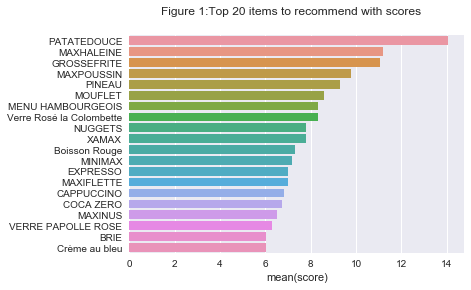

In [150]:
top_ranking=k(Ranking)
sns.barplot(y=top_ranking.index[:top],x=top_ranking['score'][:top]),sns.plt.suptitle('Figure 1:Top %d items to recommend with scores' %top);

MAKE RECOMMENDATION IN ACCORDING TO PRODUCT GROUPS

In [151]:
Products=pd.read_csv("C:/Users/Pham Antoine/products_Bordeaux.csv",sep=';')

In [152]:
Products.columns=['ID','ProductID','ProductName','ProductGroupID','ProductGroupName','GrossPrice','NetPrice','GuidedActivityID','WorkingOrder']

In [153]:
Working_Order_type={0:'Menu', 1:'Beverage', 2:'Starter', 3 :'MainDishes',
4 :'Dessert', 5:'Coffee', 6:'Digestive', 7:'Others'}  

In [154]:
Products['WorkingOrderType']=Products['WorkingOrder']


In [155]:
Products['WorkingOrderType'].replace(Working_Order_type, inplace=True)

In [156]:
Products.head(1)

,ID,ProductID,ProductName,ProductGroupID,ProductGroupName,GrossPrice,NetPrice,GuidedActivityID,WorkingOrder,WorkingOrderType
0,5,5.0,FUMAX,2.0,PLAT-SALADE,11.25,12.5,NaN,3,MainDishes


In [157]:
p=pd.DataFrame(Products.groupby(['ProductGroupName','ProductGroupID','ProductName','ProductID',
                                 'WorkingOrder','WorkingOrderType'],as_index=False).sum())

In [158]:
p.head(1)

,ProductGroupName,ProductGroupID,ProductName,ProductID,WorkingOrder,WorkingOrderType,ID,GrossPrice,NetPrice,GuidedActivityID
0,ACCOMPAGNEMENTMOUFLET,12.0,GROSSEFRITE,24.0,3,MainDishes,24,2.7,3.0,0.0


In [159]:
r=k(Ranking).reset_index()
r=r.rename(columns={'index':'ProductName'})

In [160]:
Ranking_final=pd.merge(p,r,on=('ProductName'),how='left').sort_values('score',ascending=False)
# 'left' for conserving all rows of the data set ' Products'

In [161]:
Ranking_final.shape

(155, 11)

In [162]:
num_missing(Ranking_final['score'])
# note there are 5 new items which have no been seen in the training tasks

5

In [163]:
Ranking_final.loc[np.isnan(Ranking_final['score']),['ProductName','score']]

,ProductName,score
57,KIR ROYAL,NaN
139,Agape,NaN
141,Château Le Fagé,NaN
150,Verre Chardonnay domaine des deux ruisseaux,NaN
151,Verre Château Le fagé,NaN


Prediction on each product group

In [164]:
# create  lists for  each product group
Ranking_final_PGroup=list()
for i in np.unique(Ranking_final['ProductGroupID']):
   Ranking_final_PGroup.append(Ranking_final.set_index(['ProductGroupID','ProductGroupName']).loc[i])
# set the first index ='ProductGroupID' and use .loc by it

In [165]:
# keep some columns only
for i in range(len(Ranking_final_PGroup)):
    print((Ranking_final_PGroup[i]).loc[:,['ProductName','score']])

                 ProductName     score
ProductGroupName                      
PLAT-SALADE          TARTARE  4.395253
PLAT-SALADE         AVECESAR  4.126858
PLAT-SALADE           SAUMON  3.724137
PLAT-SALADE            FUMAX  2.943588
PLAT-SALADE         TOURISTE  2.587683
PLAT-SALADE            HAMPE  2.188178
                 ProductName     score
ProductGroupName                      
PETITES FAIMS     MAXPOUSSIN  9.788350
PETITES FAIMS        NUGGETS  7.790136
PETITES FAIMS        MINIMAX  7.170530
PETITES FAIMS           BRIE  6.039427
                             ProductName      score
ProductGroupName                                   
HAMBOURGEOIS                  MAXHALEINE  11.203717
HAMBOURGEOIS                       XAMAX   7.770977
HAMBOURGEOIS                  MAXIFLETTE   6.990031
HAMBOURGEOIS                     MAXINUS   6.534407
HAMBOURGEOIS                  MAXPARTOUT   5.839444
HAMBOURGEOIS                MAXCHAMPETRE   5.592430
HAMBOURGEOIS                   PLANTAM

In [166]:
# recommend top 3 items for each product group
for i in range(len(Ranking_final_PGroup)):
    top_group=3
    print(Ranking_final_PGroup[i]['ProductName'][:top_group])

ProductGroupName
PLAT-SALADE     TARTARE
PLAT-SALADE    AVECESAR
PLAT-SALADE      SAUMON
Name: ProductName, dtype: object
ProductGroupName
PETITES FAIMS    MAXPOUSSIN
PETITES FAIMS       NUGGETS
PETITES FAIMS       MINIMAX
Name: ProductName, dtype: object
ProductGroupName
HAMBOURGEOIS    MAXHALEINE
HAMBOURGEOIS         XAMAX
HAMBOURGEOIS    MAXIFLETTE
Name: ProductName, dtype: object
ProductGroupName
ACCOMPAGNEMENTS    PATATEDOUCE
ACCOMPAGNEMENTS    GROSSEFRITE
ACCOMPAGNEMENTS      DUOSALADE
Name: ProductName, dtype: object
ProductGroupName
ENTREES A PARTAGER    NUGGETS
ENTREES A PARTAGER       BRIE
ENTREES A PARTAGER      TAPAS
Name: ProductName, dtype: object
ProductGroupName
DESSERTS     MOUSSECHOCO
DESSERTS      SOUPEFRUIT
DESSERTS    CAFEGOURMAND
Name: ProductName, dtype: object
ProductGroupName
PLATMOUFLET    MAXPOUSSIN
PLATMOUFLET       NUGGETS
PLATMOUFLET       MINIMAX
Name: ProductName, dtype: object
ProductGroupName
ACCOMPAGNEMENTMOUFLET    GROSSEFRITE
Name: ProductName, dtyp

MAKE RECOMMENDATION IN ACCORDING TO WORKING ORDER TYPE

In [167]:
Ranking_final.head(1)

,ProductGroupName,ProductGroupID,ProductName,ProductID,WorkingOrder,WorkingOrderType,ID,GrossPrice,NetPrice,GuidedActivityID,score
3,ACCOMPAGNEMENTS,5.0,PATATEDOUCE,25.0,3,MainDishes,25,2.7,3.0,0.0,14.063978


In [168]:
# create  lists for  each product group
Ranking_final_WOtype=list()
for i in np.unique(Ranking_final['WorkingOrder']):
   Ranking_final_WOtype.append(Ranking_final.set_index(['WorkingOrder','WorkingOrderType']).loc[i])

In [169]:
# keep some columns only
for i in range(len(Ranking_final_WOtype)):
    print((Ranking_final_WOtype[i]).loc[:,['ProductName','score']])

                        ProductName     score
WorkingOrderType                             
Menu                        MOUFLET  8.598155
Menu              MENU HAMBOURGEOIS  8.340251
Menu                      MENU PLAT  2.982282
Menu                      FRAICHEUR  2.907064
                                                  ProductName     score
WorkingOrderType                                                       
Beverage                                               PINEAU  9.301815
Beverage                             Verre Rosé la Colombette  8.312802
Beverage                                        Boisson Rouge  7.290705
Beverage                                             EXPRESSO  7.015879
Beverage                                             EXPRESSO  7.015879
Beverage                                            COCA ZERO  6.753781
Beverage                                   VERRE PAPOLLE ROSE  6.279223
Beverage                                                OASIS  5.781665
Beve

FILTERING SOLD ITEMS 

In [170]:
 # Simulate items ordered by an user who has been selecting 1,2,3 or 4 items
 OrderHeader_ProductID=np.random.choice(Ranking.index, size=np.random.randint(1,4),replace=True)# PUT THE NEW DATA HERTE

In [171]:
print(OrderHeader_ProductID.tolist())

['PLANTAMAX']


In [172]:
ordered_item=list()
for i in OrderHeader_ProductID:
    ordered_item.append(i)

In [173]:
ordered_WO_type=np.ravel(p.loc[p['ProductName'].isin(ordered_item),['WorkingOrderType']].values).tolist()
print(np.unique(ordered_WO_type))

['MainDishes']


In [174]:
# find items that doesn't belong to Working Order type of sold items
top_n_ranking[pd.Series(top_n_ranking).isin (p.loc[~p['WorkingOrderType'].isin (ordered_WO_type)]['ProductName'])]

array(['PINEAU', 'MOUFLET', 'MENU HAMBOURGEOIS',
       'Verre Rosé la Colombette', 'Boisson Rouge', 'EXPRESSO',
       'CAPPUCCINO', 'COCA ZERO', 'VERRE PAPOLLE ROSE', 'OASIS', 'BAILEYS',
       'MOUSSECHOCO', 'SOUPEFRUIT', 'DOUBLE EXPRESSO', 'CAFEGOURMAND',
       'CREMEBRULEE', 'CROQUANT', 'KEKETTE EXTRA', 'SALADEASIAT',
       'CAFEGOURMANDMENU', 'DESPERADOS', 'GIN', 'JUS FRUIT MAISON',
       'Verre de Bordeaux Rouge Agape', 'PUNCH Maison', 'MOKACCINO', 'KIR',
       'SIROP', 'PELFORTH', 'BADOIT 33cl', 'COCA', 'TAPAS',
       'BIERE SANS GLUTEN', 'LATTE MACCHIATTO', 'THE GLACE', 'KEKETTE RED',
       'VERRE MAX CUVEE', 'ABATILLES PLATES', 'MENU PLAT', 'RED BULL',
       'FRAICHEUR', 'GRIMBERGEN', 'PICHET PUNCH',
       'VERRE PAPOLLE BLANC SEC', 'ORANGINA', 'HOEGGARDEN', 'DECA',
       'PAPOLLE BLANC MOEL', 'GATEAUCAROTTE', 'SCHWEPPES', 'INFUSION',
       'PINT PELFORTH', 'VERRE PAPOLLE ROUGE', 'THE', 'MARTINI',
       'CHAMPAGNE BOUTEILLE', 'WHISKY', 'LILLET', 'EVIAN',
       'VE

In [175]:
top=20
print('Following the last choice of the user here is the top %d of Items to recommend :' %top)
for i in top_n_ranking[pd.Series(top_n_ranking).isin (p.loc[~p['WorkingOrderType'].isin (ordered_WO_type)]['ProductName'])][:top]:
    print(i, end = ' *** ')

Following the last choice of the user here is the top 20 of Items to recommend :
PINEAU *** MOUFLET *** MENU HAMBOURGEOIS *** Verre Rosé la Colombette *** Boisson Rouge *** EXPRESSO *** CAPPUCCINO *** COCA ZERO *** VERRE PAPOLLE ROSE *** OASIS *** BAILEYS *** MOUSSECHOCO *** SOUPEFRUIT *** DOUBLE EXPRESSO *** CAFEGOURMAND *** CREMEBRULEE *** CROQUANT *** KEKETTE EXTRA *** SALADEASIAT *** CAFEGOURMANDMENU *** 

In [176]:
top_n_ranking1=top_n_ranking[pd.Series(top_n_ranking).isin (p.loc[~p['WorkingOrderType'].isin (ordered_WO_type)]['ProductName'])][:top]

C:\Program Files\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


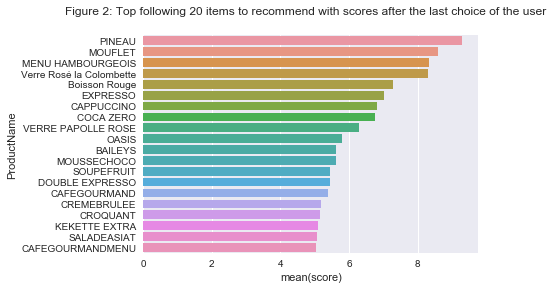

In [177]:
sns.barplot(y=k(r.loc[r['ProductName'].isin (top_n_ranking1)])['ProductName'][:top],x=k(r.loc[r['ProductName'].isin (top_n_ranking1)]['score'][:top])),
sns.plt.suptitle('Figure 2: Top following %d items to recommend with scores after the last choice of the user' %top);

In [178]:
Ranking_final

,ProductGroupName,ProductGroupID,ProductName,ProductID,WorkingOrder,WorkingOrderType,ID,GrossPrice,NetPrice,GuidedActivityID,score
3,ACCOMPAGNEMENTS,5.0,PATATEDOUCE,25.0,3,MainDishes,25,2.70,3.0,0.0,14.063978
86,HAMBOURGEOIS,4.0,MAXHALEINE,16.0,3,MainDishes,16,9.00,10.0,5.0,11.203717
0,ACCOMPAGNEMENTMOUFLET,12.0,GROSSEFRITE,24.0,3,MainDishes,24,2.70,3.0,0.0,11.046517
2,ACCOMPAGNEMENTS,5.0,GROSSEFRITE,24.0,3,MainDishes,24,2.70,3.0,0.0,11.046517
108,PETITES FAIMS,3.0,MAXPOUSSIN,14.0,3,MainDishes,14,5.40,6.0,0.0,9.788350
117,PLATMOUFLET,11.0,MAXPOUSSIN,14.0,3,MainDishes,14,5.40,6.0,0.0,9.788350
14,APERITIFS,16.0,PINEAU,72.0,1,Beverage,72,3.20,5.0,7.0,9.301815
106,MENU,39.0,MOUFLET,37.0,0,Menu,37,9.00,10.0,3.0,8.598155
104,MENU,39.0,MENU HAMBOURGEOIS,35.0,0,Menu,35,14.40,16.0,1.0,8.340251
152,VINS,19.0,Verre Rosé la Colombette,202.0,1,Beverage,202,0.00,4.0,0.0,8.312802


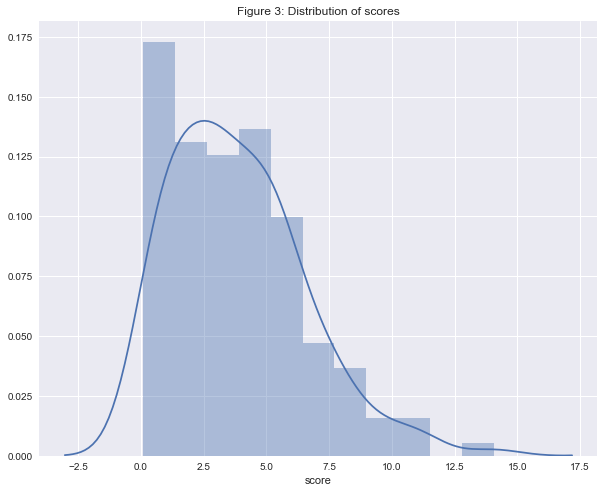

In [179]:
import math
#figsize=(16,14)
def hist_viz(df,feature):
    f, ax = plt.subplots(figsize=(10,8))
    ax = sns.distplot([value for value in df[feature] if not math.isnan(value)])
    plt.xlabel(feature)
    plt.title('Figure 3: Distribution of scores')
    plt.show()
hist_viz(Ranking_final,'score')
# We need to specify a feature vector

C:\Program Files\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


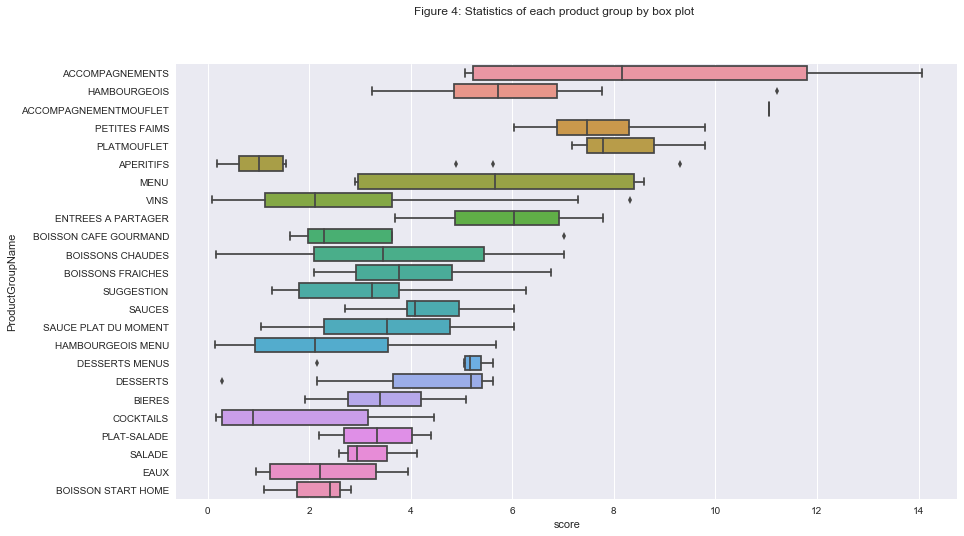

In [180]:
#box plot overallqual/salepricehttps://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python
f, ax = plt.subplots(figsize=(14,8))
fig = sns.boxplot(y=Ranking_final['ProductGroupName'], x=Ranking_final['score']) # making a Box Plot to observe average
fig,plt.suptitle('Figure 4: Statistics of each product group by box plot');


PRICE BASED PREDICTION OPTIMIZATION

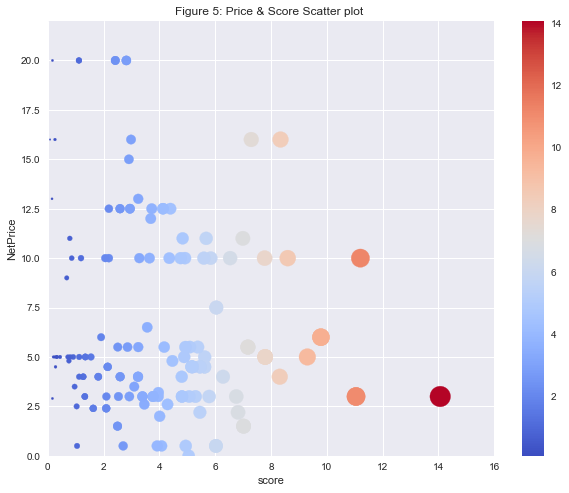

In [181]:
#https://pandas.pydata.org/pandas-docs/version/0.18.1/generated/pandas.DataFrame.plot.scatter.html
#scatter plot with Pandas DF:  avg_ticfket vs. Number of prod.
fig, ax = plt.subplots()# if missing stick labels: https://stackoverflow.com/questions/43578976/pandas-missing-x-tick-labels
Ranking_final.plot.scatter(x='score',y='NetPrice',xlim=(0,16),ylim=(0,22),
                        s=Ranking_final['score'].values*30,c=Ranking_final['score'],
                                    cmap="coolwarm",figsize=(10,8),ax=ax),plt.title('Figure 5: Price & Score Scatter plot ');


In [182]:
# take items that satisfait a cutoff
Ranking_final1=pd.DataFrame(Ranking_final.loc[(Ranking_final['score']>5)|((Ranking_final['NetPrice']>7.5)&(Ranking_final['score']>3)),:])

Ranking_final1.drop_duplicates(['ProductName'], keep='first',inplace=True)

Ranking_final1.index=range(len(Ranking_final1))

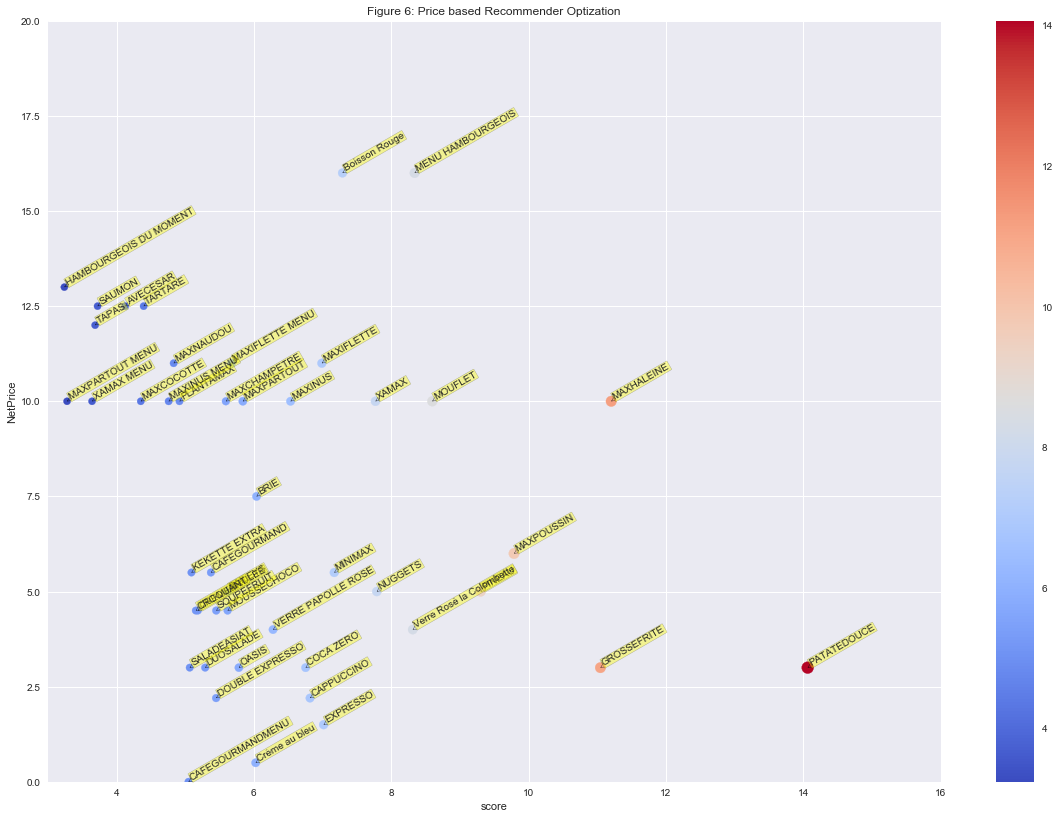

In [183]:
# plot all selected items
fig, ax = plt.subplots();
Ranking_final1.plot.scatter(x='score',y='NetPrice',xlim=(3,16),ylim=(0,20),
                        s=Ranking_final['score'].values*10,c=Ranking_final1['score'],
                                    cmap="coolwarm",figsize=(20,14),ax=ax),plt.title('Figure 6: Price based Recommender Optization');
for i, txt in enumerate(Ranking_final1['ProductName']):
    ax.annotate(txt, (Ranking_final1['score'][i],Ranking_final1['NetPrice'][i]),
               textcoords='data', ha='left', va='bottom',rotation=30,
        bbox=dict(boxstyle='round,pad=0.05', fc='yellow', alpha=0.4),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'));

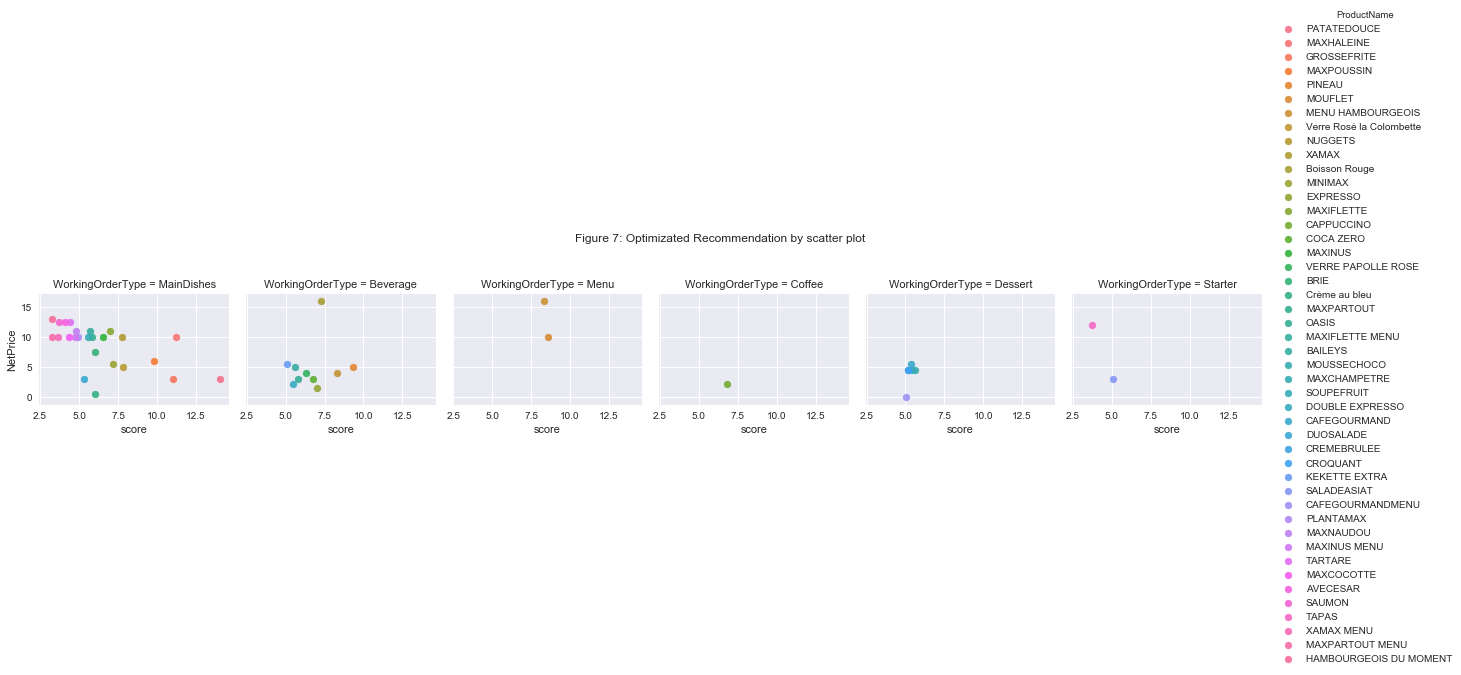

In [184]:
# # plot all selected items by WorkingOrederType
g = sns.FacetGrid(Ranking_final1, col="WorkingOrderType", hue="ProductName")
g.map(plt.scatter, "score", "NetPrice", alpha=.9);
g.add_legend();
plt.subplots_adjust(top=0.7)
g.fig.suptitle('Figure 7: Optimizated Recommendation by scatter plot');

In [185]:
# create a column called 'total_score' that sums the score and the net price of the item
Ranking_final1['score']=Ranking_final1['score'].round(3)

Ranking_final1['optimized_score']=(Ranking_final1[['NetPrice']].values+Ranking_final1[['score']].values)

Ranking_opt=Ranking_final1[['ProductGroupName','WorkingOrderType','ProductName','NetPrice','score','optimized_score']].sort_values(ascending=False,by=['optimized_score'])

Ranking_opt.index=range(len(Ranking_opt))

Predict by taking in account the price of item and group by WorkingOrderType

In [186]:
pd.set_option('max_colwidth',30)
for i in (np.unique(Ranking_opt[['WorkingOrderType']])):
    print(Ranking_opt.loc[Ranking_opt['WorkingOrderType']==i])

         ProductGroupName WorkingOrderType               ProductName  \
1                    VINS         Beverage             Boisson Rouge   
21              APERITIFS         Beverage                    PINEAU   
28                   VINS         Beverage  Verre Rosé la Colombette   
30              APERITIFS         Beverage                   BAILEYS   
31                 BIERES         Beverage             KEKETTE EXTRA   
32             SUGGESTION         Beverage        VERRE PAPOLLE ROSE   
35      BOISSONS FRAICHES         Beverage                 COCA ZERO   
39      BOISSONS FRAICHES         Beverage                     OASIS   
40  BOISSON CAFE GOURMAND         Beverage                  EXPRESSO   
43       BOISSONS CHAUDES         Beverage           DOUBLE EXPRESSO   

    NetPrice  score  optimized_score  
1       16.0  7.291           23.291  
21       5.0  9.302           14.302  
28       4.0  8.313           12.313  
30       5.0  5.621           10.621  
31       5.5

Predict by taking in account the price of item and group by ProductGroup

     ProductGroupName WorkingOrderType  ProductName  NetPrice   score  \
22  ACCOMPAGNEMENT...       MainDishes  GROSSEFRITE       3.0  11.047   

    optimized_score  
22           14.047   Figure(432x288) Axes(0.125,0.125;0.775x0.755)


C:\Program Files\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


   ProductGroupName WorkingOrderType  ProductName  NetPrice   score  \
6   ACCOMPAGNEMENTS       MainDishes  PATATEDOUCE       3.0  14.064   
41  ACCOMPAGNEMENTS       MainDishes    DUOSALADE       3.0   5.291   
42  ACCOMPAGNEMENTS          Starter  SALADEASIAT       3.0   5.066   

    optimized_score  
6            17.064  
41            8.291  
42            8.066   Figure(432x288) Axes(0.125,0.125;0.775x0.755)
   ProductGroupName WorkingOrderType ProductName  NetPrice  score  \
21        APERITIFS         Beverage      PINEAU       5.0  9.302   
30        APERITIFS         Beverage     BAILEYS       5.0  5.621   

    optimized_score  
21           14.302  
30           10.621   Figure(432x288) Axes(0.125,0.125;0.775x0.755)
   ProductGroupName WorkingOrderType    ProductName  NetPrice  score  \
31           BIERES         Beverage  KEKETTE EXTRA       5.5  5.091   

    optimized_score  
31           10.591   Figure(432x288) Axes(0.125,0.125;0.775x0.755)
     ProductGroupName Work

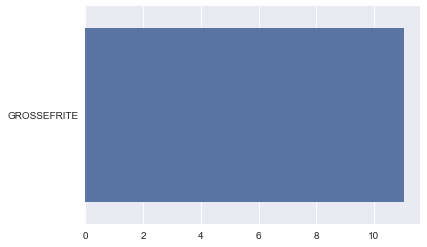

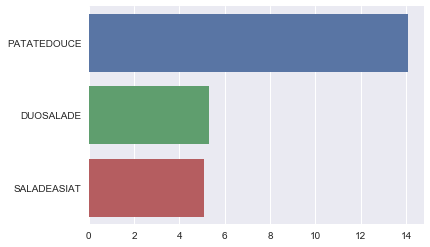

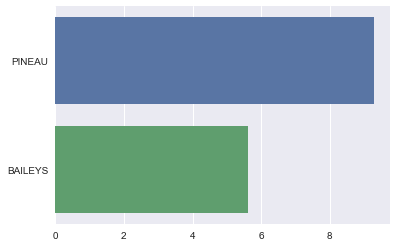

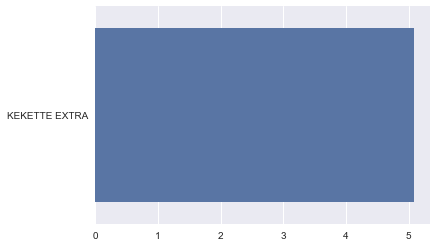

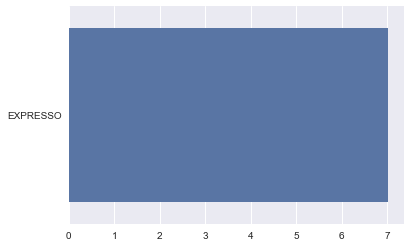

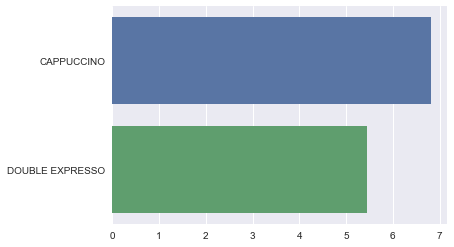

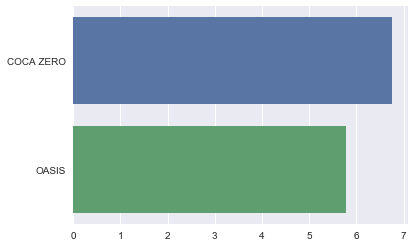

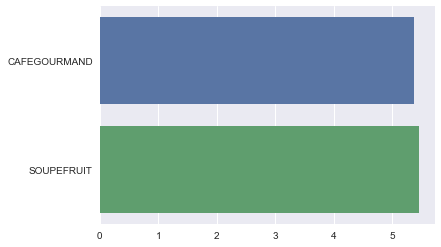

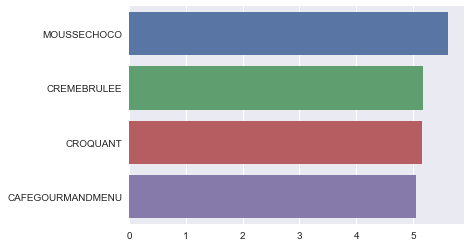

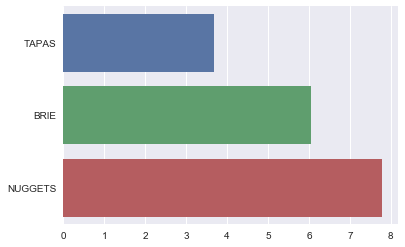

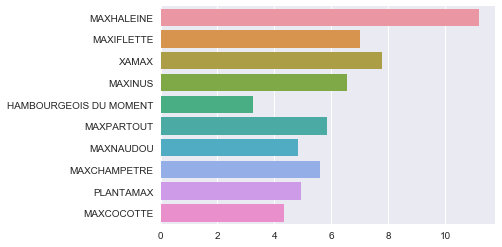

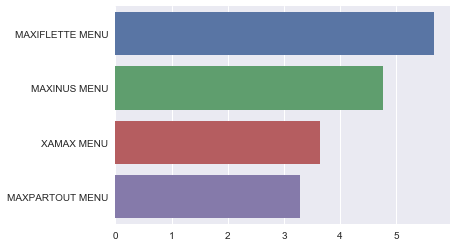

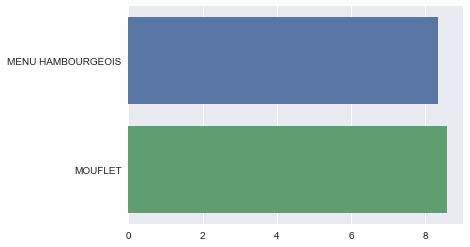

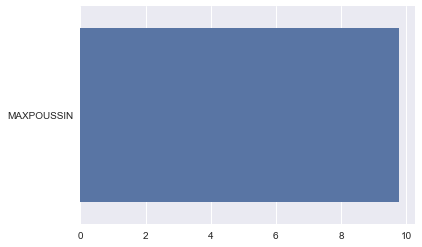

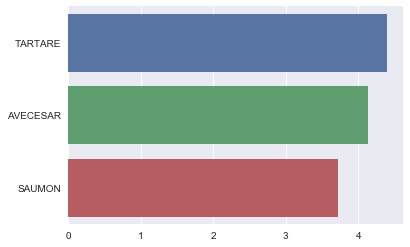

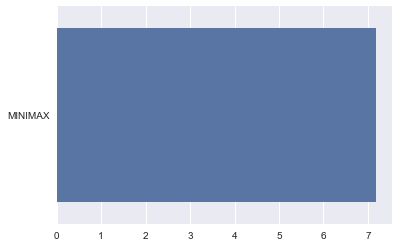

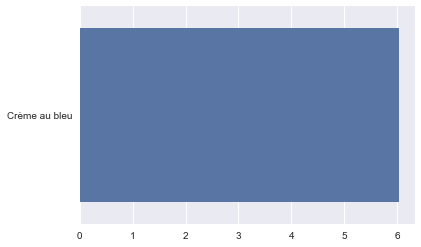

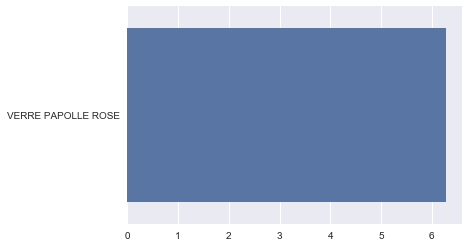

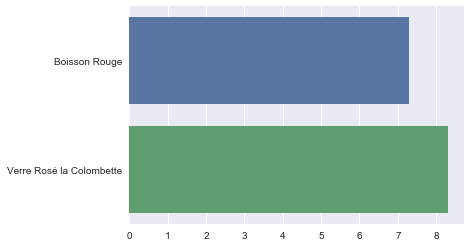

In [187]:
pd.set_option('max_colwidth',18)
for i in (np.unique(Ranking_opt[['ProductGroupName']])):
    print(Ranking_opt.loc[Ranking_opt['ProductGroupName']==i], plt.figure(i),sns.barplot(y=np.ravel(Ranking_opt.loc[Ranking_opt['ProductGroupName']==i ,['ProductName']].values).tolist(),
                      x=np.ravel(Ranking_opt.loc[Ranking_opt['ProductGroupName']==i  ,['score']].values).tolist()))
   # plt.figure()
    #print(i,sns.barplot(y=np.ravel(Ranking_opt.loc[Ranking_opt['ProductGroupName']==i ,['ProductName']].values).tolist(),
     #                 x=np.ravel(Ranking_opt.loc[Ranking_opt['ProductGroupName']==i  ,['score']].values).tolist()));  
    

In [188]:
Ranking_opt.set_index(['WorkingOrderType','ProductGroupName']).sort_index()

ProductName  NetPrice   score  \
WorkingOrderType ProductGroupName                                          
Beverage         APERITIFS                      PINEAU       5.0   9.302   
                 APERITIFS                     BAILEYS       5.0   5.621   
                 BIERES                  KEKETTE EXTRA       5.5   5.091   
                 BOISSON CAFE GO...           EXPRESSO       1.5   7.016   
                 BOISSONS CHAUDES      DOUBLE EXPRESSO       2.2   5.450   
                 BOISSONS FRAICHES           COCA ZERO       3.0   6.754   
                 BOISSONS FRAICHES               OASIS       3.0   5.782   
                 SUGGESTION          VERRE PAPOLLE ...       4.0   6.279   
                 VINS                    Boisson Rouge      16.0   7.291   
                 VINS                Verre Rosé la ...       4.0   8.313   
Coffee           BOISSONS CHAUDES           CAPPUCCINO       2.2   6.818   
Dessert          DESSERTS                 CAFEGOURMAND       5.5   5.375   
                 DESSERTS                   SOUPEFRUIT       4.5   5.452   
                 DESSERTS MENUS            MOUSSECHOCO       4.5   5.618   
                 DESSERTS MENUS            CREMEBRULEE       4.5   5.184   
                 DESSERTS MENUS               CROQUANT       4.5   5.155   
                 DESSERTS MENUS       CAFEGOURMANDMENU       0.0   5.048   
MainDishes       ACCOMPAGNEMENTM...        GROSSEFRITE       3.0  11.047   
                 ACCOMPAGNEMENTS           PATATEDOUCE       3.0  14.064   
                 ACCOMPAGNEMENTS             DUOSALADE       3.0   5.291   
                 ENTREES A PARTAGER               BRIE       7.5   6.039   
                 ENTREES A PARTAGER            NUGGETS       5.0   7.790   
                 HAMBOURGEOIS               MAXHALEINE      10.0  11.204   
                 HAMBOURGEOIS               MAXIFLETTE      11.0   6.990   
                 HAMBOURGEOIS                    XAMAX      10.0   7.771   
                 HAMBOURGEOIS                  MAXINUS      10.0   6.534   
                 HAMBOURGEOIS        HAMBOURGEOIS D...      13.0   3.241   
                 HAMBOURGEOIS               MAXPARTOUT      10.0   5.839   
                 HAMBOURGEOIS                MAXNAUDOU      11.0   4.832   
                 HAMBOURGEOIS             MAXCHAMPETRE      10.0   5.592   
                 HAMBOURGEOIS                PLANTAMAX      10.0   4.917   
                 HAMBOURGEOIS               MAXCOCOTTE      10.0   4.354   
                 HAMBOURGEOIS MENU     MAXIFLETTE MENU      11.0   5.676   
                 HAMBOURGEOIS MENU        MAXINUS MENU      10.0   4.759   
                 HAMBOURGEOIS MENU          XAMAX MENU      10.0   3.644   
                 HAMBOURGEOIS MENU     MAXPARTOUT MENU      10.0   3.280   
                 PETITES FAIMS              MAXPOUSSIN       6.0   9.788   
                 PLAT-SALADE                   TARTARE      12.5   4.395   
                 PLAT-SALADE                  AVECESAR      12.5   4.127   
                 PLAT-SALADE                    SAUMON      12.5   3.724   
                 PLATMOUFLET                   MINIMAX       5.5   7.171   
                 SAUCES                  Crème au bleu       0.5   6.026   
Menu             MENU                MENU HAMBOURGEOIS      16.0   8.340   
                 MENU                          MOUFLET      10.0   8.598   
Starter          ACCOMPAGNEMENTS           SALADEASIAT       3.0   5.066   
                 ENTREES A PARTAGER              TAPAS      12.0   3.688   

                                     optimized_score  
WorkingOrderType ProductGroupName                     
Beverage         APERITIFS                    14.302  
                 APERITIFS                    10.621  
                 BIERES                       10.591  
                 BOISSON CAFE GO...            8.516  
                 BOISSONS CHAUDES              7.650  
         

In [189]:
[Ranking_opt.set_index(['WorkingOrderType','ProductGroupName']).sort_index().index[i]  for i in range(len(Ranking_opt))]

[('Beverage', 'APERITIFS'),
 ('Beverage', 'APERITIFS'),
 ('Beverage', 'BIERES'),
 ('Beverage', 'BOISSON CAFE GOURMAND'),
 ('Beverage', 'BOISSONS CHAUDES'),
 ('Beverage', 'BOISSONS FRAICHES'),
 ('Beverage', 'BOISSONS FRAICHES'),
 ('Beverage', 'SUGGESTION'),
 ('Beverage', 'VINS'),
 ('Beverage', 'VINS'),
 ('Coffee', 'BOISSONS CHAUDES'),
 ('Dessert', 'DESSERTS'),
 ('Dessert', 'DESSERTS'),
 ('Dessert', 'DESSERTS MENUS'),
 ('Dessert', 'DESSERTS MENUS'),
 ('Dessert', 'DESSERTS MENUS'),
 ('Dessert', 'DESSERTS MENUS'),
 ('MainDishes', 'ACCOMPAGNEMENTMOUFLET'),
 ('MainDishes', 'ACCOMPAGNEMENTS'),
 ('MainDishes', 'ACCOMPAGNEMENTS'),
 ('MainDishes', 'ENTREES A PARTAGER'),
 ('MainDishes', 'ENTREES A PARTAGER'),
 ('MainDishes', 'HAMBOURGEOIS'),
 ('MainDishes', 'HAMBOURGEOIS'),
 ('MainDishes', 'HAMBOURGEOIS'),
 ('MainDishes', 'HAMBOURGEOIS'),
 ('MainDishes', 'HAMBOURGEOIS'),
 ('MainDishes', 'HAMBOURGEOIS'),
 ('MainDishes', 'HAMBOURGEOIS'),
 ('MainDishes', 'HAMBOURGEOIS'),
 ('MainDishes', 'HAMBOURGEOI

These below codes can be utilized to prepare the data with R